#**Uplift_202309預測**

1. 資料時間
  * 訓練資料：202306+202308活動（0823週三匯元日7523）/data202306_1.csv
  * 測試資料：202309
  * 驗證資料：

2. 資料進度


#Data preprocess

## Data_Train

In [1]:
#連接goole drive
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unrar x /content/drive/MyDrive/Sinopac/Rawdata/Rawdata_202304_sql.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/Sinopac/Rawdata/Rawdata_202304_sql.rar

Extracting  Rawdata_202304_sql.csv                                         0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81% 82% 83% 84% 85% 86% 87% 88% 89% 90% 91% 92% 93% 94% 95%

In [ ]:
c = pd.read_csv('/content/drive/MyDrive/Sinopac/c.csv')
cols = c.name[:672]
cols = cols.drop(cols.index[665:668])
cols

NameError: ignored

In [ ]:
#Dask dataframe才能處理資料
import dask.dataframe as dd
import pandas as pd
c = pd.read_csv('/content/drive/MyDrive/Sinopac/c.csv')
cols = c.name[:672]
cols = cols.drop(cols.index[665:668])
df = dd.read_csv('/content/Rawdata_202304_sql.csv',on_bad_lines = 'skip', names=cols,
        dtype={'BIRTH_MM': 'float64',
       '生日月份': 'float64',
        'BILL_SEND_MARK': 'object',
       'BUS_IND_CTG': 'object',
       'CAMPAIGN_ID': 'object',
       'CONTACT_ADDR_VALID': 'object',
       'CUST_ID': 'object',
       'LEAD_ID': 'object',
       'MST_ACCT_ID': 'object',
       'OWNER_IDN': 'object',
       'PHONE8_VALID': 'object',
       'REG_QUO_MARK': 'object',
       'RLT_ACCT_MARK': 'object',
       'SALARY_PROXY_NUM': 'object',
       'SAVING_BOX_MARK': 'object',
       '企金行業別': 'object',
       '對帳單寄送記號': 'object',
       '負責人ID': 'object',
        'GENDER': 'float64',
       '性別': 'float64',
       'ELOAN_JOB_TITLE': 'object',
       'USERID': 'float64',
        'CUSTID': 'object'}
)

In [ ]:
df.columns
#length = 669

Index(['USERID', '客戶分層', '資料年月', '最初開戶日', '最初開戶日_YYYYMM', 'UNINO', '年齡',
       '公司戶記號', '中小企業記號', '負責人ID',
       ...
       'LISTED_COM_EMP_FG', 'MDAWHO_FG', 'LINE_FG', 'STOCK_VIP', '換匯基因標籤',
       'CUST_ID', '換匯發送名單', 'CUSTID', 'TOTALNTAMOUNT', '跨售行為'],
      dtype='object', length=669)

In [ ]:
%%time
#dask dataframe to pd.dataframe(執行約4min)
df = df.drop(df.iloc[:, 207:663], axis=1)

#移除無意義的欄位
drop_vars = [
   "負責人ID", '美金存款註記','人民幣存款註記','南非幣存款註記','總放款平均利率','一般房貸利率','理財房貸利率_LINE','理財房貸利率_LN',
   '主動推介_特定金錢信託客戶投資有價證券推介同意書', '薪轉公司統編','生日月份','客戶職稱','經管人員AO','分行別','負責人ID', '資料年月',
    '最初開戶日','最初開戶日_YYYYMM','存款開戶日', '信用卡開戶日', '信貸開戶日', '信託帳戶開戶日', '信託第一筆申購日','基金第一筆申購日',
   '房貸開戶日','證券開戶日', '全行往來產品數', '最後通聯日',
   '人身保險記號','保險要保人記號', '保險被保人記號', '產險記號','產險要保人記號', '儲蓄養老險申購記號_要保人','儲蓄養老險申購記號_被保人',
   '投資型保險申購記號_要保人', '投資型保險申購記號_被保人'
]

df = df.drop(columns=drop_vars)
df = df.compute(low_memory = False)
##1032651 rows × 177 columns

CPU times: user 3min 8s, sys: 16.9 s, total: 3min 25s
Wall time: 2min 40s


In [ ]:
df

,USERID,客戶分層,UNINO,年齡,公司戶記號,中小企業記號,性別,CIFAOCODE,呆帳記號_含信用卡,客戶年收入,...,證券最近交易日,證券推介開戶記號,信用卡自動扣款記號,數位帳戶等級記號,換匯基因標籤,CUST_ID,換匯發送名單,CUSTID,TOTALNTAMOUNT,跨售行為
0,6.000660e+09,沉睡戶,G2773539090,20,0,-,2.0,120800,0,100.0,...,1900-01-01,0,N,0,11.8597,NaN,NaN,NaN,NaN,NaN
1,6.000822e+09,價值戶,G2775019350,21,0,-,2.0,119800,0,300.0,...,1900-01-01,0,N,0,99.3052,NaN,NaN,NaN,NaN,NaN
2,1.000443e+09,潛力戶,G2775162320,10,0,-,2.0,120800,0,100.0,...,1900-01-01,0,N,0,74.5474,NaN,NaN,NaN,NaN,NaN
3,6.000113e+09,沉睡戶,A1730469470,44,0,-,1.0,137S66,0,800.0,...,1900-01-01,0,N,0,23.3039,NaN,NaN,NaN,NaN,NaN
4,5.369349e+08,沉睡戶,A1730469560,44,0,-,1.0,030800,0,0.0,...,1900-01-01,0,N,0,17.7961,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13554,5.370330e+08,沉睡戶,Z2229579310,56,0,-,2.0,192800,0,0.0,...,1900-01-01,0,N,0,26.8092,NaN,NaN,NaN,NaN,NaN
13555,5.370377e+08,沉睡戶,Z2229585220,43,0,-,2.0,131800,0,0.0,...,1900-01-01,0,N,0,48.9415,NaN,NaN,NaN,NaN,NaN
13556,1.000170e+09,潛力戶,Z2222292010,53,0,-,2.0,024S66,0,0.0,...,1900-01-01,0,N,0,90.1528,NaN,NaN,NaN,NaN,NaN
13557,3.000371e+09,潛力戶,G1729062580,48,0,-,1.0,120800,0,0.0,...,1900-01-01,0,N,0,39.4543,NaN,NaN,NaN,NaN,NaN


###空值處理

['銀行推介_證券端記號', '跨售行為', '換匯發送名單', '換匯基因標籤', '投資屬性', '客戶行業別', '外幣活存記號', '信用卡職位別', '住宅記號', '企金行業別', 'TOTALNTAMOUNT', 'CUST_ID','CUSTID']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032651 entries, 0 to 13558
Columns: 177 entries, USERID to 跨售行為
dtypes: float64(120), int64(41), object(16)
memory usage: 1.4+ GB


In [ ]:
#包含空值的欄位
df.columns[df.isnull().sum()>0].sort_values(ascending = False)

Index(['銀行推介_證券端記號', '跨售行為', '換匯發送名單', '換匯基因標籤', '投資屬性', '客戶行業別', '外幣活存記號',
       '信用卡職位別', '住宅記號', '企金行業別', 'TOTALNTAMOUNT', 'CUST_ID', 'CUSTID'],
      dtype='object')

In [ ]:
df.isnull().sum().sort_values(ascending = False)
#企金行業別            1028152
#跨售行為             1023619
#TOTALNTAMOUNT    1023619
#CUSTID           1023619
#換匯發送名單            996512

企金行業別            1028152
跨售行為             1023619
TOTALNTAMOUNT    1023619
CUSTID           1023619
換匯發送名單            996512
                  ...   
放款總餘額房貸                0
撥款總額                   0
撥款總額信貸                 0
撥款總額房貸                 0
當年房貸壽險貸款AP             0
Length: 177, dtype: int64

In [ ]:
#空值處理
#保留性別、客戶行業別
na_col = ['銀行推介_證券端記號', '投資屬性', '外幣活存記號',
        '信用卡職位別', '住宅記號', '企金行業別', 'CUST_ID','CUSTID']
df = df.drop(columns=na_col)

In [ ]:
#客戶行業別
df['客戶行業別'][df['客戶行業別'].isnull()]='其他'
#補0
#'跨售行為', '換匯發送名單', '換匯基因標籤', 'TOTALNTAMOUNT'
df = df.fillna(0)

<ipython-input-10-30709a2e5218>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['客戶行業別'][df['客戶行業別'].isnull()]='其他'


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1032651 entries, 0 to 13558
Columns: 169 entries, USERID to 跨售行為
dtypes: float64(116), int64(41), object(12)
memory usage: 1.3+ GB


###處理重複購買問題

In [ ]:
#df[df['TOTALNTAMOUNT']>0] #9032
df[df['跨售行為']>0] #9032
#df[df['換匯發送名單']>0] #36139

,USERID,客戶分層,UNINO,年齡,公司戶記號,中小企業記號,性別,CIFAOCODE,呆帳記號_含信用卡,客戶年收入,...,證券庫存股檔數,證券現股庫存市值,證券最近交易日,證券推介開戶記號,信用卡自動扣款記號,數位帳戶等級記號,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為
58,5.369319e+08,價值戶,H1771490190,43,0,-,1.0,018800,0,1500.0,...,0,0.0,1900-01-01,0,N,0,98.6364,0.0,15692.0,1.0
305,6.000039e+09,潛力戶,H1739928280,28,0,-,1.0,188S66,0,400.0,...,0,0.0,1900-01-01,0,N,0,76.0074,0.0,20000.0,1.0
340,1.000348e+09,價值戶,A1733577470,45,0,-,1.0,002S66,0,1202.0,...,0,0.0,1900-01-01,0,N,0,98.8657,0.0,18679.0,1.0
462,6.000106e+09,潛力戶,A1793612320,53,0,-,1.0,018800,0,1500.0,...,0,0.0,2006-10-14,0,N,0,96.8091,0.0,10000.0,1.0
463,6.000106e+09,潛力戶,A1793612320,53,0,-,1.0,018800,0,1500.0,...,0,0.0,2006-10-14,0,N,0,96.8091,0.0,10000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12592,1.000568e+09,沉睡戶,F2773450040,61,0,-,2.0,144S66,0,550.0,...,0,0.0,1900-01-01,0,N,0,35.0773,1.0,86027.0,1.0
12618,6.000033e+09,潛力戶,Y2725151060,52,0,-,2.0,045800,0,1200.0,...,0,0.0,1900-01-01,0,N,0,82.7978,0.0,10000.0,1.0
12914,5.370762e+08,價值戶,Y2725253370,61,0,-,2.0,837W06,0,1185.0,...,0,0.0,1900-01-01,0,Y,0,99.5584,0.0,466793.0,1.0
13124,1.000137e+09,沉睡戶,F2773354050,46,0,-,2.0,029800,0,0.0,...,0,0.0,1900-01-01,0,N,0,87.8015,0.0,33366.0,1.0


In [ ]:
#1032651-3633=1029018
df[df.duplicated(subset=['UNINO'], keep='last')] #3633 rows × 169 columns

,USERID,客戶分層,UNINO,年齡,公司戶記號,中小企業記號,性別,CIFAOCODE,呆帳記號_含信用卡,客戶年收入,...,證券庫存股檔數,證券現股庫存市值,證券最近交易日,證券推介開戶記號,信用卡自動扣款記號,數位帳戶等級記號,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為
462,6.000106e+09,潛力戶,A1793612320,53,0,-,1.0,018800,0,1500.0,...,0,0.0,2006-10-14,0,N,0,96.8091,0.0,10000.0,1.0
463,6.000106e+09,潛力戶,A1793612320,53,0,-,1.0,018800,0,1500.0,...,0,0.0,2006-10-14,0,N,0,96.8091,0.0,10000.0,1.0
580,6.001021e+09,潛力戶,A1734562540,44,0,-,1.0,122800,0,1000.0,...,0,0.0,1900-01-01,0,Y,0,54.7410,0.0,50000.0,1.0
743,1.000161e+09,沉睡戶,A1734269810,44,0,-,1.0,028S66,0,0.0,...,0,0.0,1900-01-01,0,N,0,35.2130,0.0,770.0,1.0
3270,1.000008e+09,潛力戶,G2790044490,39,0,-,2.0,120S66,0,400.0,...,0,0.0,1900-01-01,0,N,0,92.0429,0.0,1558.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12571,1.000568e+09,沉睡戶,F2773450040,61,0,-,2.0,144S66,0,550.0,...,0,0.0,1900-01-01,0,N,0,35.0773,1.0,85707.0,1.0
12572,1.000568e+09,沉睡戶,F2773450040,61,0,-,2.0,144S66,0,550.0,...,0,0.0,1900-01-01,0,N,0,35.0773,1.0,357499.0,1.0
12589,1.000568e+09,沉睡戶,F2773450040,61,0,-,2.0,144S66,0,550.0,...,0,0.0,1900-01-01,0,N,0,35.0773,1.0,85870.0,1.0
12590,1.000568e+09,沉睡戶,F2773450040,61,0,-,2.0,144S66,0,550.0,...,0,0.0,1900-01-01,0,N,0,35.0773,1.0,85698.0,1.0


In [ ]:
import pandas as pd

# 使用groupby和agg将相同UNINO的TOTALNTAMOUNT加总，同时保留所有其他列
agg_funcs = {col: 'first' if col != 'TOTALNTAMOUNT' else 'sum' for col in df.columns}
df = df.groupby('UNINO').agg(agg_funcs)
df.reset_index(drop=True)
df

,USERID,客戶分層,UNINO,年齡,公司戶記號,中小企業記號,性別,CIFAOCODE,呆帳記號_含信用卡,客戶年收入,...,證券庫存股檔數,證券現股庫存市值,證券最近交易日,證券推介開戶記號,信用卡自動扣款記號,數位帳戶等級記號,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為
UNINO,,,,,,,,,,,,,,,,,,,,,
19039293TA8,5.370141e+08,沉睡戶,19039293TA8,58,0,-,1.0,018800,0,0.0,...,0,0.0,1900-01-01,0,N,0,67.4193,0.0,0.0,0.0
19042120PA8,5.371498e+08,沉睡戶,19042120PA8,53,0,-,1.0,002800,0,0.0,...,0,0.0,1900-01-01,0,N,0,66.9281,0.0,0.0,0.0
19052324OK8,5.369261e+08,沉睡戶,19052324OK8,60,0,-,1.0,018800,0,0.0,...,0,0.0,1900-01-01,0,N,0,25.5337,0.0,0.0,0.0
19052578MU0,6.000070e+09,沉睡戶,19052578MU0,60,0,-,1.0,144P29,0,1000.0,...,0,0.0,1900-01-01,0,N,0,0.0000,0.0,0.0,0.0
19079774PA8,5.369392e+08,沉睡戶,19079774PA8,60,0,-,1.0,018800,0,0.0,...,0,0.0,1900-01-01,0,N,0,34.3031,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z2229999030,6.000323e+09,價值戶,Z2229999030,79,0,-,2.0,171S66,0,0.0,...,0,0.0,1900-01-01,0,N,0,97.6952,0.0,0.0,0.0
Z2422221010,6.000460e+09,沉睡戶,Z2422221010,46,0,-,2.0,015N2F,0,1440.0,...,0,0.0,1900-01-01,0,N,0,22.1820,0.0,0.0,0.0
Z2422273090,6.000646e+09,價值戶,Z2422273090,57,0,-,2.0,104S66,0,0.0,...,0,0.0,1900-01-01,0,Y,0,91.3962,0.0,0.0,0.0


In [ ]:
#df[df['TOTALNTAMOUNT']>0] #5399
df[['跨售行為', 'TOTALNTAMOUNT']][df['跨售行為']>0] #5399
df[['跨售行為', 'TOTALNTAMOUNT']][df['跨售行為']>0 & (df['TOTALNTAMOUNT']>0)] #5399

,跨售行為,TOTALNTAMOUNT
UNINO,,
A1223258150,1.0,3110.0
A1225235440,1.0,31185.0
A1227718770,1.0,1879.0
A1228308980,1.0,9317.0
A1229210420,1.0,134805.0
...,...,...
Z1222500670,1.0,7392.0
Z1229184510,1.0,315840.0
Z1229970930,1.0,467700.0


In [ ]:
df['TOTALNTAMOUNT'].mean()

456.0673671403221

In [ ]:
df.info

<bound method DataFrame.info of                USERID 客戶分層        UNINO  年齡  公司戶記號 中小企業記號   性別 CIFAOCODE  \
0        6.000660e+09  沉睡戶  G2773539090  20      0      -  2.0    120800   
1        6.000822e+09  價值戶  G2775019350  21      0      -  2.0    119800   
2        1.000443e+09  潛力戶  G2775162320  10      0      -  2.0    120800   
3        6.000113e+09  沉睡戶  A1730469470  44      0      -  1.0    137S66   
4        5.369349e+08  沉睡戶  A1730469560  44      0      -  1.0    030800   
...               ...  ...          ...  ..    ...    ...  ...       ...   
1029013  5.370330e+08  沉睡戶  Z2229579310  56      0      -  2.0    192800   
1029014  5.370377e+08  沉睡戶  Z2229585220  43      0      -  2.0    131800   
1029015  1.000170e+09  潛力戶  Z2222292010  53      0      -  2.0    024S66   
1029016  3.000371e+09  潛力戶  G1729062580  48      0      -  1.0    120800   
1029017  1.000055e+09  沉睡戶  G1729146210  49      0      -  1.0    120S66   

         呆帳記號_含信用卡  客戶年收入  ... 證券庫存股檔數  證券現股庫存市值     證券

In [ ]:
df = df.fillna(0)

In [ ]:
df.columns
unino = df['UNINO']
drop_id = ['USERID','UNINO', 'CIFAOCODE']
df = df.drop(columns=drop_id)

###Datatype 處理

In [ ]:
df.columns[df.dtypes=='object']

Index(['客戶分層', '中小企業記號', '客戶行業別', '對帳單寄送記號', '電子化通路記號_電子帳單或收EDM', '信用卡VIP客戶註記',
       '外幣存款記號', '信用卡轉呆記號', '證券最近交易日', '信用卡自動扣款記號'],
      dtype='object')

In [ ]:
#Datatype 處理
#不處理時間序列 #做one-hot
drop_time = ['存款最近交易日','信託最近交易日','基金最近申購日','證券最近交易日']
df = df.drop(columns=drop_time)

#Catrgorical 變數
## example of label encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
## define data
var_dummy = df.columns[df.dtypes=='object']
df = pd.get_dummies(df, columns = var_dummy, drop_first = True)
#'客戶分層', '中小企業記號', '客戶行業別', '對帳單寄送記號', '電子化通路記號_電子帳單或收EDM',
#'信用卡VIP客戶註記','外幣存款記號', '信用卡轉呆記號', '信用卡自動扣款記號'
## define label encoding
#encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
#labelencoder = LabelEncoder()
## transform data
#onehot = encoder.fit_transform(df[var_dummy])
#for d in df[var_dummy]:
#  df[d] = labelencoder.fit_transform(df[d])

In [ ]:
df.insert(0, 'UNINO', unino)
df

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
UNINO,,,,,,,,,,,,,,,,,,,,,
19039293TA8,19039293TA8,58,0,1.0,0,0.0,1,0,0,3,...,0,0,0,1,0,0,0,0,0,0
19042120PA8,19042120PA8,53,0,1.0,0,0.0,1,0,0,3,...,0,0,0,0,0,1,0,0,0,0
19052324OK8,19052324OK8,60,0,1.0,0,0.0,1,0,0,3,...,0,0,0,1,0,0,0,0,0,0
19052578MU0,19052578MU0,60,0,1.0,0,1000.0,1,0,0,3,...,0,0,0,0,0,1,0,1,0,0
19079774PA8,19079774PA8,60,0,1.0,0,0.0,1,0,0,3,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z2229999030,Z2229999030,79,0,2.0,0,0.0,1,2,0,3,...,0,0,0,1,0,0,0,0,0,0
Z2422221010,Z2422221010,46,0,2.0,0,1440.0,1,3,0,1,...,0,0,0,0,0,1,0,1,0,0
Z2422273090,Z2422273090,57,0,2.0,0,0.0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1029018 entries, 19039293TA8 to ZD522294410
Columns: 205 entries, UNINO to 信用卡自動扣款記號_Y
dtypes: float64(115), int64(38), object(1), uint8(51)
memory usage: 1.2+ GB


###Correlation

In [ ]:
df.corr()

,客戶分層,年齡,公司戶記號,中小企業記號,性別,呆帳記號_含信用卡,客戶年收入,客戶行業別,網路會員記號,網路使用記號_行動銀行,...,證券庫存股股數,證券庫存股檔數,證券現股庫存市值,證券推介開戶記號,信用卡自動扣款記號,數位帳戶等級記號,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為
客戶分層,1.000000,-0.183491,NaN,-0.008744,-0.001177,-0.022178,-0.000510,0.056031,-0.009667,0.073215,...,0.004655,-0.005483,-0.009368,-0.007284,0.001327,NaN,0.184738,-0.090038,-0.001199,0.000126
年齡,-0.183491,1.000000,NaN,0.011678,0.014978,0.027203,-0.002814,0.018157,0.000866,-0.153609,...,-0.004990,0.007499,0.012717,-0.036113,0.168238,NaN,0.104403,0.036987,0.002467,0.004719
公司戶記號,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
中小企業記號,-0.008744,0.011678,NaN,1.000000,-0.004098,-0.000152,0.000404,-0.000313,0.000138,-0.003663,...,-0.000409,-0.000150,-0.000144,-0.002880,0.001242,NaN,0.010706,0.002713,-0.000288,-0.000853
性別,-0.001177,0.014978,NaN,-0.004098,1.000000,-0.020982,-0.001137,-0.109447,-0.000356,0.002681,...,0.001022,-0.001911,-0.001806,-0.010562,-0.004504,NaN,0.036646,0.019478,0.000153,0.010635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
數位帳戶等級記號,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
換匯基因標籤,0.184738,0.104403,NaN,0.010706,0.036646,-0.060986,0.000165,0.064894,0.018569,0.017191,...,0.036850,0.019344,0.028667,0.030457,0.159482,NaN,1.000000,0.132499,0.000130,0.072312
換匯發送名單,-0.090038,0.036987,NaN,0.002713,0.019478,-0.017330,-0.000889,0.010187,0.000888,0.038445,...,0.008590,0.008790,0.016030,0.017675,0.021347,NaN,0.132499,1.000000,0.000812,0.004972
TOTALNTAMOUNT,-0.001199,0.002467,NaN,-0.000288,0.000153,0.000795,0.000201,-0.000391,0.000288,-0.001857,...,-0.000278,-0.000149,-0.000124,0.000420,0.001527,NaN,0.000130,0.000812,1.000000,-0.000364


In [ ]:
#Output 前處理後的資料
df.to_csv('/content/drive/MyDrive/Sinopac/Rawdata/data202304_2.csv.zip', compression = 'zip')
#[1029018 rows x 169 columns]

In [ ]:
df

,客戶分層,年齡,公司戶記號,中小企業記號,性別,呆帳記號_含信用卡,客戶年收入,客戶行業別,網路會員記號,網路使用記號_行動銀行,...,證券庫存股股數,證券庫存股檔數,證券現股庫存市值,證券推介開戶記號,信用卡自動扣款記號,數位帳戶等級記號,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為
0,1,20,0,0,2.0,0,100.0,10,1,3,...,0.0,0,0.0,0,0,0,11.8597,0.0,0.0,0.0
1,0,21,0,0,2.0,0,300.0,10,1,1,...,0.0,0,0.0,0,0,0,99.3052,0.0,0.0,0.0
2,2,10,0,0,2.0,0,100.0,5,1,1,...,0.0,0,0.0,0,0,0,74.5474,0.0,0.0,0.0
3,1,44,0,0,1.0,0,800.0,1,1,3,...,0.0,0,0.0,0,0,0,23.3039,0.0,0.0,0.0
4,1,44,0,0,1.0,0,0.0,5,1,0,...,0.0,0,0.0,0,0,0,17.7961,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029013,1,56,0,0,2.0,0,0.0,16,1,0,...,0.0,0,0.0,0,0,0,26.8092,0.0,0.0,0.0
1029014,1,43,0,0,2.0,0,0.0,11,1,2,...,0.0,0,0.0,0,0,0,48.9415,0.0,0.0,0.0
1029015,2,53,0,0,2.0,0,0.0,11,1,2,...,0.0,0,0.0,0,0,0,90.1528,0.0,0.0,0.0
1029016,2,48,0,0,1.0,0,0.0,5,1,3,...,0.0,0,0.0,0,0,0,39.4543,0.0,0.0,0.0


In [ ]:
df.pivot_table(index=['客戶分層','換匯發送名單'], columns= '跨售行為', values= 'TOTALNTAMOUNT', margins=True, aggfunc=['mean', 'max', 'min', 'count'])

##Data_Test

In [ ]:
!unrar x /content/drive/MyDrive/Sinopac/Rawdata/Rawdata_202308_sql.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/Sinopac/Rawdata/Rawdata_202308_sql.rar

Extracting  Rawdata_202308_sql.csv                                         0%  1%  2%  3%  4%  5%  6%  7%  8%  9% 10% 11% 12% 13% 14% 15% 16% 17% 18% 19% 20% 21% 22% 23% 24% 25% 26% 27% 28% 29% 30% 31% 32% 33% 34% 35% 36% 37% 38% 39% 40% 41% 42% 43% 44% 45% 46% 47% 48% 49% 50% 51% 52% 53% 54% 55% 56% 57% 58% 59% 60% 61% 62% 63% 64% 65% 66% 67% 68% 69% 70% 71% 72% 73% 74% 75% 76% 77% 78% 79% 80% 81% 82% 83% 84% 85% 86% 87% 88% 89% 90% 91% 92% 93% 94% 95%

In [ ]:
import pandas as pd
c = pd.read_csv('/content/drive/MyDrive/Sinopac/c_2.csv')
cols = c.name[:665]
cols.pop(cols.index[663])
cols

0                 USERID
1                   客戶分層
2                   資料年月
3                  最初開戶日
4           最初開戶日_YYYYMM
             ...        
659    LISTED_COM_EMP_FG
660            MDAWHO_FG
661              LINE_FG
662            STOCK_VIP
664               換匯基因標籤
Name: name, Length: 664, dtype: object

In [ ]:
#Dask dataframe才能處理資料
import dask.dataframe as dd
import pandas as pd
c = pd.read_csv('/content/drive/MyDrive/Sinopac/c_2.csv')
cols = c.name[:665]
cols.pop(cols.index[663])
df = dd.read_csv('/content/Rawdata_202308_sql.csv',on_bad_lines = 'skip', names=cols,
        dtype={'BIRTH_MM': 'float64',
       '生日月份': 'float64',
        'BILL_SEND_MARK': 'object',
       'BUS_IND_CTG': 'object',
       'CAMPAIGN_ID': 'object',
       'CONTACT_ADDR_VALID': 'object',
       'CUST_ID': 'object',
       'LEAD_ID': 'object',
       'MST_ACCT_ID': 'object',
       'OWNER_IDN': 'object',
       'PHONE8_VALID': 'object',
       'REG_QUO_MARK': 'object',
       'RLT_ACCT_MARK': 'object',
       'SALARY_PROXY_NUM': 'object',
       'SAVING_BOX_MARK': 'object',
       '企金行業別': 'object',
       '對帳單寄送記號': 'object',
       '負責人ID': 'object',
        'GENDER': 'float64',
       '性別': 'float64',
       'ELOAN_JOB_TITLE': 'object',
       'USERID': 'float64',
        'CUSTID': 'object'}
)

In [ ]:
df.columns
#length = 664

Index(['USERID', '客戶分層', '資料年月', '最初開戶日', '最初開戶日_YYYYMM', 'UNINO', '年齡',
       '公司戶記號', '中小企業記號', '負責人ID',
       ...
       'AO_CODE', 'GRA_CODE', 'IBRAIN_FG', 'DIGITAL_FG',
       'SALARY_TRN_ACT_EMP_FG', 'LISTED_COM_EMP_FG', 'MDAWHO_FG', 'LINE_FG',
       'STOCK_VIP', '換匯基因標籤'],
      dtype='object', length=664)

In [ ]:
%%time
#dask dataframe to pd.dataframe(執行約4min)
df = df.drop(df.iloc[:, 207:663], axis=1)

#移除無意義的欄位
drop_vars = [
   "負責人ID", '美金存款註記','人民幣存款註記','南非幣存款註記','總放款平均利率','一般房貸利率','理財房貸利率_LINE','理財房貸利率_LN',
   '主動推介_特定金錢信託客戶投資有價證券推介同意書', '薪轉公司統編','生日月份','客戶職稱','經管人員AO','分行別','負責人ID', '資料年月',
    '最初開戶日','最初開戶日_YYYYMM','存款開戶日', '信用卡開戶日', '信貸開戶日', '信託帳戶開戶日', '信託第一筆申購日','基金第一筆申購日',
   '房貸開戶日','證券開戶日', '全行往來產品數', '最後通聯日',
   '人身保險記號','保險要保人記號', '保險被保人記號', '產險記號','產險要保人記號', '儲蓄養老險申購記號_要保人','儲蓄養老險申購記號_被保人',
   '投資型保險申購記號_要保人', '投資型保險申購記號_被保人'
]

df = df.drop(columns=drop_vars)
df = df.compute(low_memory = False)
##1054433 rows × 172 columns

CPU times: user 3min 1s, sys: 22.3 s, total: 3min 24s
Wall time: 2min 38s


In [ ]:
df

,USERID,客戶分層,UNINO,年齡,公司戶記號,中小企業記號,性別,CIFAOCODE,呆帳記號_含信用卡,客戶年收入,...,證券近三個月交易額,證券近六個月交易額,證券庫存股股數,證券庫存股檔數,證券現股庫存市值,證券最近交易日,證券推介開戶記號,信用卡自動扣款記號,數位帳戶等級記號,換匯基因標籤
0,6.000953e+09,沉睡戶,A1521309050,23,0,-,1.0,181800,0,400.0,...,0.0,0.0,0.0,0,0.0,1900-01-01,0,N,0,0.0059
1,6.001018e+09,潛力戶,A1521310270,23,0,-,1.0,038800,0,250.0,...,0.0,0.0,0.0,0,0.0,1900-01-01,0,N,0,43.1608
2,6.000772e+09,潛力戶,A1521312590,23,0,-,1.0,112800,0,120.0,...,0.0,0.0,0.0,0,0.0,1900-01-01,0,N,0,2.4923
3,6.000826e+09,沉睡戶,A1521318940,23,0,-,1.0,021800,0,100.0,...,0.0,0.0,0.0,0,0.0,1900-01-01,0,N,0,66.0665
4,1.000066e+09,沉睡戶,A1521321420,23,0,-,1.0,162800,0,0.0,...,0.0,0.0,0.0,0,0.0,1900-01-01,0,N,0,15.3138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13639,6.000200e+09,潛力戶,Y2729821390,55,0,-,2.0,135P09,0,200.0,...,0.0,0.0,0.0,0,0.0,1900-01-01,0,N,0,NaN
13640,6.000202e+09,潛力戶,Y2729821750,58,0,-,2.0,135S66,0,1086.0,...,0.0,0.0,0.0,0,0.0,1900-01-01,0,N,0,86.4484
13641,5.371300e+08,沉睡戶,Y2729823350,62,0,-,2.0,135800,0,0.0,...,0.0,0.0,0.0,0,0.0,1900-01-01,0,N,0,25.8643
13642,6.000251e+09,潛力戶,Y2729824530,55,0,-,2.0,006P30,0,700.0,...,0.0,0.0,0.0,0,0.0,1900-01-01,0,Y,0,NaN


###空值處理

['銀行推介_證券端記號', '換匯基因標籤', '投資屬性', '性別', '客戶行業別', '外幣活存記號', '信用卡職位別', '住宅記號', '企金行業別', 'USERID']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054433 entries, 0 to 13643
Columns: 172 entries, USERID to 換匯基因標籤
dtypes: float64(117), int64(41), object(14)
memory usage: 1.4+ GB


In [ ]:
#包含空值的欄位
df.columns[df.isnull().sum()>0].sort_values(ascending = False)

Index(['銀行推介_證券端記號', '換匯基因標籤', '投資屬性', '性別', '客戶行業別', '外幣活存記號', '信用卡職位別',
       '住宅記號', '企金行業別', 'USERID'],
      dtype='object')

In [ ]:
df.isnull().sum().sort_values(ascending = False)
#企金行業別         1049932
#銀行推介_證券端記號     990780
#投資屬性           896582
#信用卡職位別         755566
#外幣活存記號         565468

企金行業別         1049932
銀行推介_證券端記號     990780
投資屬性           896582
信用卡職位別         755566
外幣活存記號         565468
               ...   
撥款總額                0
撥款總額信貸              0
撥款總額房貸              0
無擔保額度               0
當年度放款總AP            0
Length: 172, dtype: int64

In [ ]:
#空值處理
#保留性別、客戶行業別
na_col = ['銀行推介_證券端記號', '投資屬性', '外幣活存記號',
        '信用卡職位別', '住宅記號', '企金行業別']
df = df.drop(columns=na_col)

In [ ]:
#客戶行業別
df['客戶行業別'][df['客戶行業別'].isnull()]='其他'
df['性別'][df['性別'].isnull()]=1.0
#補0
#'換匯基因標籤'
df = df.fillna(0)

<ipython-input-16-66e60a903d04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['客戶行業別'][df['客戶行業別'].isnull()]='其他'
<ipython-input-16-66e60a903d04>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['性別'][df['性別'].isnull()]=1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054433 entries, 0 to 13643
Columns: 166 entries, USERID to 換匯基因標籤
dtypes: float64(113), int64(41), object(12)
memory usage: 1.3+ GB


In [ ]:
drop_id = ['USERID','CIFAOCODE']
df = df.drop(columns=drop_id)

In [ ]:
import pandas as pd
df
#1054433 rows × 164 columns

,客戶分層,UNINO,年齡,公司戶記號,中小企業記號,性別,呆帳記號_含信用卡,客戶年收入,客戶行業別,網路會員記號,...,證券近三個月交易額,證券近六個月交易額,證券庫存股股數,證券庫存股檔數,證券現股庫存市值,證券最近交易日,證券推介開戶記號,信用卡自動扣款記號,數位帳戶等級記號,換匯基因標籤
0,沉睡戶,A1521309050,23,0,-,1.0,0,400.0,批發及零售業,1,...,0.0,0.0,0.0,0,0.0,1900-01-01,0,N,0,0.0059
1,潛力戶,A1521310270,23,0,-,1.0,0,250.0,住宿及餐飲業,1,...,0.0,0.0,0.0,0,0.0,1900-01-01,0,N,0,43.1608
2,潛力戶,A1521312590,23,0,-,1.0,0,120.0,住宿及餐飲業,1,...,0.0,0.0,0.0,0,0.0,1900-01-01,0,N,0,2.4923
3,沉睡戶,A1521318940,23,0,-,1.0,0,100.0,學生,1,...,0.0,0.0,0.0,0,0.0,1900-01-01,0,N,0,66.0665
4,沉睡戶,A1521321420,23,0,-,1.0,0,0.0,學生,1,...,0.0,0.0,0.0,0,0.0,1900-01-01,0,N,0,15.3138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13639,潛力戶,Y2729821390,55,0,-,2.0,0,200.0,家管,1,...,0.0,0.0,0.0,0,0.0,1900-01-01,0,N,0,0.0000
13640,潛力戶,Y2729821750,58,0,-,2.0,0,1086.0,批發及零售業,1,...,0.0,0.0,0.0,0,0.0,1900-01-01,0,N,0,86.4484
13641,沉睡戶,Y2729823350,62,0,-,2.0,0,0.0,各級學校/學術機構,1,...,0.0,0.0,0.0,0,0.0,1900-01-01,0,N,0,25.8643
13642,潛力戶,Y2729824530,55,0,-,2.0,0,700.0,保險業,1,...,0.0,0.0,0.0,0,0.0,1900-01-01,0,Y,0,0.0000


In [ ]:
df.to_csv('temp.csv')

###Datatype 處理

In [ ]:
df.columns[df.dtypes=='object']

Index(['客戶分層', 'UNINO', '中小企業記號', '客戶行業別', '對帳單寄送記號', '電子化通路記號_電子帳單或收EDM',
       '信用卡VIP客戶註記', '外幣存款記號', '信用卡轉呆記號', '證券最近交易日', '信用卡自動扣款記號'],
      dtype='object')

In [ ]:
unino = df.pop('UNINO')
df

,客戶分層,年齡,公司戶記號,中小企業記號,性別,呆帳記號_含信用卡,客戶年收入,客戶行業別,網路會員記號,網路使用記號_行動銀行,...,證券近三個月交易額,證券近六個月交易額,證券庫存股股數,證券庫存股檔數,證券現股庫存市值,證券最近交易日,證券推介開戶記號,信用卡自動扣款記號,數位帳戶等級記號,換匯基因標籤
0,沉睡戶,23,0,-,1.0,0,400.0,批發及零售業,1,2,...,0.0,0.0,0.0,0,0.0,1900-01-01,0,N,0,0.0059
1,潛力戶,23,0,-,1.0,0,250.0,住宿及餐飲業,1,1,...,0.0,0.0,0.0,0,0.0,1900-01-01,0,N,0,43.1608
2,潛力戶,23,0,-,1.0,0,120.0,住宿及餐飲業,1,2,...,0.0,0.0,0.0,0,0.0,1900-01-01,0,N,0,2.4923
3,沉睡戶,23,0,-,1.0,0,100.0,學生,1,0,...,0.0,0.0,0.0,0,0.0,1900-01-01,0,N,0,66.0665
4,沉睡戶,23,0,-,1.0,0,0.0,學生,1,0,...,0.0,0.0,0.0,0,0.0,1900-01-01,0,N,0,15.3138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13639,潛力戶,55,0,-,2.0,0,200.0,家管,1,2,...,0.0,0.0,0.0,0,0.0,1900-01-01,0,N,0,0.0000
13640,潛力戶,58,0,-,2.0,0,1086.0,批發及零售業,1,1,...,0.0,0.0,0.0,0,0.0,1900-01-01,0,N,0,86.4484
13641,沉睡戶,62,0,-,2.0,0,0.0,各級學校/學術機構,1,0,...,0.0,0.0,0.0,0,0.0,1900-01-01,0,N,0,25.8643
13642,潛力戶,55,0,-,2.0,0,700.0,保險業,1,1,...,0.0,0.0,0.0,0,0.0,1900-01-01,0,Y,0,0.0000


In [ ]:
#Datatype 處理
#不處理時間序列 #做one-hot
drop_time = ['存款最近交易日','信託最近交易日','基金最近申購日','證券最近交易日']
df = df.drop(columns=drop_time)

#Catrgorical 變數
## example of label encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
## define data
var_dummy = df.columns[df.dtypes=='object']
df = pd.get_dummies(df, columns = var_dummy, drop_first = True)
#'客戶分層', '中小企業記號', '客戶行業別', '對帳單寄送記號', '電子化通路記號_電子帳單或收EDM',
#'信用卡VIP客戶註記','外幣存款記號', '信用卡轉呆記號', '信用卡自動扣款記號'
## define label encoding
#encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
#labelencoder = LabelEncoder()
## transform data
#onehot = encoder.fit_transform(df[var_dummy])
#for d in df[var_dummy]:
#  df[d] = labelencoder.fit_transform(df[d])

In [ ]:
df.insert(0, 'UNINO', unino)
df

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,A1521309050,23,0,1.0,0,400.0,1,2,0,1,...,0,0,0,0,0,1,0,0,0,0
1,A1521310270,23,0,1.0,0,250.0,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,A1521312590,23,0,1.0,0,120.0,1,2,0,1,...,0,0,0,0,0,1,0,0,0,0
3,A1521318940,23,0,1.0,0,100.0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,A1521321420,23,0,1.0,0,0.0,1,0,0,6,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13639,Y2729821390,55,0,2.0,0,200.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
13640,Y2729821750,58,0,2.0,0,1086.0,1,1,0,1,...,0,0,0,1,0,0,0,1,0,0
13641,Y2729823350,62,0,2.0,0,0.0,1,0,0,3,...,0,0,0,0,0,1,0,0,0,0
13642,Y2729824530,55,0,2.0,0,700.0,1,1,0,1,...,0,0,0,1,0,0,0,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054433 entries, 0 to 13643
Columns: 202 entries, UNINO to 信用卡自動扣款記號_Y
dtypes: float64(112), int64(38), object(1), uint8(51)
memory usage: 1.2+ GB


###Correlation

In [ ]:
df.corr()

<ipython-input-29-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,網路使用記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
年齡,1.000000,NaN,0.014248,2.821825e-02,-2.500367e-03,NaN,-0.157090,-0.332591,0.253046,0.059248,...,-0.012367,0.027506,-0.022761,0.293376,0.058213,-0.301557,0.039897,-0.049116,0.029084,0.167168
公司戶記號,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
性別,0.014248,NaN,1.000000,-2.112278e-02,-1.295961e-03,NaN,0.002597,-0.008609,-0.013146,-0.002259,...,0.053759,0.002980,-0.049240,0.000890,-0.002413,-0.000444,0.008261,0.020354,-0.017050,-0.004489
呆帳記號_含信用卡,0.028218,NaN,-0.021123,1.000000e+00,-7.580876e-07,NaN,0.009401,-0.014262,-0.010713,-0.017721,...,-0.005471,-0.001899,-0.002972,0.019434,0.011536,-0.021382,-0.008064,-0.016895,0.932059,-0.016072
客戶年收入,-0.002500,NaN,-0.001296,-7.580876e-07,1.000000e+00,NaN,0.005438,-0.002866,-0.008276,-0.001479,...,0.002266,0.000659,-0.000916,-0.009053,-0.001382,0.009229,0.000818,0.009218,0.000128,-0.001105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
對帳單寄送記號_2,-0.301557,NaN,-0.000444,-2.138168e-02,9.229334e-03,NaN,0.208215,0.057225,-0.402602,0.038139,...,0.043032,0.004514,0.048370,-0.983055,-0.137988,1.000000,-0.010074,0.197642,-0.020999,-0.047174
信用卡VIP客戶註記_Y,0.039897,NaN,0.008261,-8.064140e-03,8.184530e-04,NaN,0.003270,-0.013452,0.018803,0.053979,...,0.002320,0.009485,0.001789,0.010094,0.000231,-0.010074,1.000000,0.015472,-0.007534,0.114413
外幣存款記號_Y,-0.049116,NaN,0.020354,-1.689546e-02,9.217971e-03,NaN,0.086835,0.165923,-0.245738,0.065112,...,0.023577,0.038164,0.003249,-0.196408,-0.015808,0.197642,0.015472,1.000000,-0.014914,0.042623
信用卡轉呆記號_Y,0.029084,NaN,-0.017050,9.320592e-01,1.275982e-04,NaN,0.007198,-0.013324,-0.009679,-0.016300,...,-0.005312,-0.001497,-0.005206,0.018845,0.012633,-0.020999,-0.007534,-0.014914,1.000000,-0.013194


In [ ]:
#Output 前處理後的資料
df.to_csv('/content/drive/MyDrive/Sinopac/Rawdata/data202308_v1.csv.zip', compression = 'zip')
#[1054433 rows × 202 columns]

In [ ]:
df

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,A1521309050,23,0,1.0,0,400.0,1,2,0,1,...,0,0,0,0,0,1,0,0,0,0
1,A1521310270,23,0,1.0,0,250.0,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,A1521312590,23,0,1.0,0,120.0,1,2,0,1,...,0,0,0,0,0,1,0,0,0,0
3,A1521318940,23,0,1.0,0,100.0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,A1521321420,23,0,1.0,0,0.0,1,0,0,6,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13639,Y2729821390,55,0,2.0,0,200.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
13640,Y2729821750,58,0,2.0,0,1086.0,1,1,0,1,...,0,0,0,1,0,0,0,1,0,0
13641,Y2729823350,62,0,2.0,0,0.0,1,0,0,3,...,0,0,0,0,0,1,0,0,0,0
13642,Y2729824530,55,0,2.0,0,700.0,1,1,0,1,...,0,0,0,1,0,0,0,1,0,1


In [ ]:
df.pivot_table(index=['客戶分層','換匯發送名單'], columns= '跨售行為', values= 'TOTALNTAMOUNT', margins=True, aggfunc=['mean', 'max', 'min', 'count'])

#Train

##資料探索

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile

# Specify the path to the zip file
#zip_file_path = 'data202305.csv.zip'
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202306_v3.csv.zip'


# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [2]:
#Complete datasets
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your May data
june_data = pd.read_csv('/content/data202306_v3.csv', index_col = 0)
june_data = june_data.reset_index(drop = True)
#june_data['換匯發送名單'] = june_data['換匯發送名單'].astype('str')

##確認模型有學到
june_data['跨售行為'] = [-1 if x == 0 else x for x in june_data['跨售行為']]
# Split the data into train and validation sets
train_data, val_data = train_test_split(june_data, test_size=0.2, random_state=42)
#823214 rows × 162 columns
#205804 rows × 162 columns
# Specify the treatment and outcome columns
unino = june_data['UNINO']
X_names = june_data.columns.drop(['換匯發送名單','TOTALNTAMOUNT', '跨售行為', 'UNINO'])
X_names
#201 columns

Index(['年齡', '公司戶記號', '性別', '呆帳記號_含信用卡', '客戶年收入', '網路會員記號', '網路使用記號_行動銀行',
       '小mma記號', '網路服務記號', '網路使用記號',
       ...
       '客戶行業別_醫療保健', '客戶行業別_金融業', '客戶行業別_電子業', '對帳單寄送記號_0', '對帳單寄送記號_1',
       '對帳單寄送記號_2', '信用卡VIP客戶註記_Y', '外幣存款記號_Y', '信用卡轉呆記號_Y', '信用卡自動扣款記號_Y'],
      dtype='object', length=201)

In [ ]:
#june_data[['跨售行為','TOTALNTAMOUNT']][june_data['TOTALNTAMOUNT']>0] #5399
#june_data[['跨售行為','TOTALNTAMOUNT']][june_data['跨售行為']>0]
june_data[(june_data['跨售行為']>0) & (june_data['TOTALNTAMOUNT']>0)]

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
103,A1220512590,70,0,1.0,0,1038.0,1,1,0,1,...,0,0,0,1,0,0,0,1,0,1
440,A1224193120,71,0,1.0,0,1500.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,1
590,A1225988350,70,0,1.0,0,480.0,1,1,0,3,...,0,0,0,0,0,1,0,1,0,0
665,A1227005080,79,0,1.0,0,0.0,1,3,0,3,...,0,0,0,0,0,1,0,1,0,1
734,A1227718770,70,0,1.0,0,6000.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052525,Z1222500670,50,0,1.0,0,800.0,1,2,0,1,...,0,0,0,0,0,1,1,1,0,0
1052832,Z2222214740,54,0,2.0,0,1000.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,1
1052923,Z2222549080,49,0,2.0,0,700.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
1053025,Z2222984010,53,0,2.0,0,100.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,1


In [ ]:
june_data['換匯發送名單'] = june_data['換匯發送名單'].astype('float')
#Treatment
print('實際發送人數：', len(june_data[june_data['換匯發送名單']>0])) ##32721
print('實際發送人數比率：', len(june_data[june_data['換匯發送名單']>0])/len(june_data))
#跨售
print('跨售人數：', len(june_data[june_data['跨售行為']>0]))
print('跨售人數比率：', len(june_data[june_data['跨售行為']>0])/len(june_data))
print('發送廣告後跨售人數：', len(june_data[(june_data['跨售行為'] > 0) & (june_data['換匯發送名單'] > 0)]))
print('發送廣告後跨售人數比率：', len(june_data[(june_data['跨售行為'] > 0) & (june_data['換匯發送名單'] > 0)])/len(june_data[june_data['換匯發送名單']>0]))
print('未發送廣告但跨售人數：', len(june_data[(june_data['跨售行為'] > 0) & (june_data['換匯發送名單'] == 0)]))
print('未發送廣告但跨售人數比率：', len(june_data[(june_data['跨售行為'] > 0) & (june_data['換匯發送名單'] == 0)])/len(june_data[june_data['換匯發送名單']==0]))

實際發送人數： 32721
實際發送人數比率： 0.031069176179253793
跨售人數： 4059
跨售人數比率： 0.0038540932768433467
發送廣告後跨售人數： 1173
發送廣告後跨售人數比率： 0.03584853763638031
未發送廣告但跨售人數： 2886
未發送廣告但跨售人數比率： 0.0028281779027777097


In [ ]:
import numpy as np
june_data['換匯發送名單'] = june_data['換匯發送名單'].astype('float')
#Treatment
print('實際發送人數：', len(june_data[june_data['換匯發送名單']>0])) ##32721
print('實際發送人數比率：', len(june_data[june_data['換匯發送名單']>0])/len(june_data))
#跨售金額
print('跨售金額：', round(np.mean(june_data['TOTALNTAMOUNT'][june_data['跨售行為']>0]),2))
print('發送廣告後跨售金額平均：',  round(np.mean(june_data['TOTALNTAMOUNT'][(june_data['跨售行為'] > 0) & (june_data['換匯發送名單'] > 0)])))
print('發送廣告後跨售金額Max：',  round(max(june_data['TOTALNTAMOUNT'][(june_data['跨售行為'] > 0) & (june_data['換匯發送名單'] > 0)])))
print('發送廣告後跨售金額min：',  round(min(june_data['TOTALNTAMOUNT'][(june_data['跨售行為'] > 0) & (june_data['換匯發送名單'] > 0)])))
print('未發送廣告但跨售金額平均：',  round(np.mean(june_data['TOTALNTAMOUNT'][(june_data['跨售行為'] > 0) & (june_data['換匯發送名單'] == 0)])))
print('未發送廣告但跨售金額Max：',  round(max(june_data['TOTALNTAMOUNT'][(june_data['跨售行為'] > 0) & (june_data['換匯發送名單'] == 0)])))
print('未發送廣告但跨售金額min：',  round(min(june_data['TOTALNTAMOUNT'][(june_data['跨售行為'] > 0) & (june_data['換匯發送名單'] == 0)])))

實際發送人數： 32721
實際發送人數比率： 0.031069176179253793
跨售金額： 126624.77
發送廣告後跨售金額平均： 120060
發送廣告後跨售金額Max： 9222840
發送廣告後跨售金額min： 100
未發送廣告但跨售金額平均： 129293
未發送廣告但跨售金額Max： 51332240
未發送廣告但跨售金額min： 100


In [ ]:
june_data['TOTALNTAMOUNT'][june_data['跨售行為']>0].describe()

count    4.059000e+03
mean     1.266248e+05
std      8.610322e+05
min      1.000000e+02
25%      8.651500e+03
50%      2.841600e+04
75%      9.335850e+04
max      5.133224e+07
Name: TOTALNTAMOUNT, dtype: float64

In [ ]:
import pandas as pd

# Assuming 'treatment' and 'amount' are your column names
cross_table_train = pd.crosstab(train_data['換匯發送名單'], train_data['跨售行為'])
cross_table_val = pd.crosstab(val_data['換匯發送名單'], val_data['跨售行為'])

# Display the cross tables
print("Cross Table for Training Data:")
print(cross_table_train)

print("\nCross Table for Validation Data:")
print(cross_table_val)


Cross Table for Training Data:
跨售行為       0.0   1.0
換匯發送名單              
0.0     814131  2302
1.0      25164   935

Cross Table for Validation Data:
跨售行為       0.0  1.0
換匯發送名單             
0.0     203428  584
1.0       6384  238


In [ ]:
print(june_data['TOTALNTAMOUNT'].mean())
print(train_data['TOTALNTAMOUNT'].mean())
print(val_data['TOTALNTAMOUNT'].mean())

488.0236714819886
434.59531032649204
701.7361014840909


In [ ]:
june_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053166 entries, 0 to 1053165
Columns: 205 entries, UNINO to 信用卡自動扣款記號_Y
dtypes: float64(115), int64(89), object(1)
memory usage: 1.6+ GB


In [ ]:
##用Subsets跑
import pandas as pd
import random
##Split dataset
random.seed(42)
# Load your May data
#Shuffle the dataset
train_data.sample(frac = 1, random_state = 42).reset_index(drop = True)
#num_subset
num_subset = 5
#subset_size
subset_size = len(train_data)//num_subset

subsets = []
for i in range(num_subset):
  start_idx = i* subset_size
  end_idx = (i+1)* subset_size
  subset = train_data.iloc[start_idx: end_idx]
  subsets.append(subset)

In [ ]:
#62282
deal_train  = train_data[train_data['跨售行為']==1.0]
deal_val = val_data[val_data['跨售行為']==1.0]
deal_train['換匯發送名單'] = deal_train['換匯發送名單'].astype('float')
deal_train
#3237 rows × 205 columns


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
101385,A2592540750,19,0,2.0,0,80.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
528390,F2795323130,62,0,2.0,0,600.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,1
815582,N2776753610,47,0,2.0,0,0.0,1,1,0,1,...,0,0,0,1,0,0,0,1,0,0
110891,A2708613790,37,0,2.0,0,0.0,1,2,0,1,...,0,0,0,1,0,0,0,1,0,0
586212,H1756900270,33,0,1.0,0,0.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806564,N2737651390,40,0,2.0,0,0.0,1,3,0,3,...,0,0,0,0,0,1,0,1,0,0
115598,A2714629030,42,0,2.0,0,0.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,1
110155,A2707787670,34,0,2.0,0,500.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
471082,F2726651610,54,0,2.0,0,1706.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,1


## CasualML_uplift

* 記錄模型時間及存下模型(CasualML_uplift_202306_1/2/3/4/5.pkl)
* 分別存下T = 0/T = 1

In [5]:
!pip install causalml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 909.4/909.4 kB 8.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 73.3 MB/s eta 0:00:00
  Using cached scikit_learn-1.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.5 MB)
  Using cached Cython-0.29.34-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.8/732.8 kB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.9 MB/s

In [6]:
!pip install duecredit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 575.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.9/179.9 kB 3.4 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd
import duecredit

from causalml.inference.tree import UpliftRandomForestClassifier
from causalml.metrics import plot_gain, get_cumgain
from sklearn.model_selection import train_test_split

import importlib
print(importlib.metadata.version('causalml') )

0.14.1


In [ ]:
#節省RAM容量 先將june_data drop掉
import gc
del june_data
gc.collect()

60

In [ ]:
%%time
df = subsets[4]
uplift_model = UpliftRandomForestClassifier(control_name='0.0')

uplift_model.fit(df[X_names].values,
                 treatment=df['換匯發送名單'].values,
                 y=df['跨售行為'].values)
#CPU times: user 2min 24s, sys: 1min 35s, total: 3min 59s
#CPU times: user 2min 23s, sys: 1min 31s, total: 3min 54s
#CPU times: user 2min 26s, sys: 1min 34s, total: 4min 1s
#CPU times: user 2min 25s, sys: 1min 35s, total: 4min

CPU times: user 2min 25s, sys: 1min 35s, total: 4min
Wall time: 2min 35s


In [ ]:
#Save model
import pickle
# Open a file and use dump()
with open('/content/drive/MyDrive/Model/CasualML_uplift_202306_5.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(uplift_model, file)

In [ ]:
%%time
df_res = uplift_model.predict(train_data[X_names].values, full_output=True)
print(df_res.shape)
df_res.head()

(842532, 5)
CPU times: user 1min 40s, sys: 4.56 s, total: 1min 44s
Wall time: 1min 43s


,0.0,1.0,recommended_treatment,delta_1.0,max_delta
0,0.004112,0.033858,1,0.029747,0.029747
1,0.004022,0.033493,1,0.029471,0.029471
2,0.005468,0.026265,1,0.020797,0.020797
3,0.004022,0.033493,1,0.029471,0.029471
4,0.004213,0.034328,1,0.030115,0.030115


In [ ]:
#Get all results from 5 Model
import pickle

def get_results(i, df):
  l = pickle.load(open("/content/drive/MyDrive/Model/CasualML_uplift_202306_"+ str(i) +".pkl", "rb"))
  df_res = l.predict(train_data[X_names].values, full_output=True)
  df['Uplift_'+ str(i)+'|T=0'] = df_res.iloc[:,0]
  df['Uplift_'+ str(i)+'|T=1'] = df_res.iloc[:,1]
  print('Finish running uplift_202306_'+ str(i))

  return df

In [ ]:
%%time
r = pd.DataFrame()
T = ['Uplift_1|T=0', 'Uplift_2|T=0', 'Uplift_3|T=0', 'Uplift_4|T=0', 'Uplift_5|T=0']
T1 = ['Uplift_1|T=1', 'Uplift_2|T=1', 'Uplift_3|T=1', 'Uplift_4|T=1', 'Uplift_5|T=1']
for i in range(1,6):
  get_results(i, r)
res['Uplift_mean|T = 0'] = r[T].mean(axis=1)
res['Uplift_mean|T = 1'] = r[T1].mean(axis=1)
res['Uplift_mean'] = res['Uplift_mean|T = 1']-res['Uplift_mean|T = 0']

res

Finish running uplift_202306_1
Finish running uplift_202306_2
Finish running uplift_202306_3
Finish running uplift_202306_4
Finish running uplift_202306_5
CPU times: user 8min 13s, sys: 25.7 s, total: 8min 39s
Wall time: 8min 31s


,換匯發送名單,TOTALNTAMOUNT,跨售行為,X_te,"E(V)|T = 0, D = 1",te,"E(V)|T = 1, D = 1",換匯基因標籤,Uplift_mean|T = 0,Uplift_mean|T = 1,Uplift_mean
0,0.0,0.0,0.0,0,171877.611205,-15491.582082,156386.029123,95.6573,0.004392,0.030030,0.025638
1,0.0,0.0,0.0,0,60231.893431,-16702.654345,43529.239086,51.2266,0.003726,0.036421,0.032695
2,0.0,0.0,0.0,0,185014.157793,-18722.602433,166291.555359,0.0000,0.004439,0.029362,0.024923
3,0.0,0.0,0.0,0,105375.134061,-16844.181767,88530.952295,92.5319,0.004514,0.035176,0.030661
4,0.0,0.0,0.0,0,134203.240261,-17052.090107,117151.150154,72.7368,0.004213,0.036763,0.032550
...,...,...,...,...,...,...,...,...,...,...,...
842527,0.0,0.0,0.0,0,92797.450155,-11850.765296,80946.684859,87.0161,0.005313,0.038764,0.033451
842528,0.0,0.0,0.0,0,100339.262909,-12616.243079,87723.019830,34.3924,0.002986,0.045579,0.042592
842529,0.0,0.0,0.0,0,95744.788643,-16623.983587,79120.805056,10.1501,0.001671,0.059648,0.057978
842530,0.0,0.0,0.0,0,112106.141114,-18647.786641,93458.354472,90.5030,0.003954,0.035925,0.031971


In [ ]:
cols = ['換匯基因標籤','換匯發送名單','TOTALNTAMOUNT','跨售行為', 'X_te', 'E(V)|T = 0, D = 1', 'te', 'E(V)|T = 1, D = 1', 'Uplift_mean|T = 0', 'Uplift_mean|T = 1', 'Uplift_mean']
res = res[cols]

In [ ]:
res['換匯基因標籤'] = train_data['換匯基因標籤'].values
res['換匯發送名單'] = train_data['換匯發送名單'].values
res['TOTALNTAMOUNT'] = train_data['TOTALNTAMOUNT'].values
res['跨售行為'] = train_data['跨售行為'].values
res

,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,X_te,"E(V)|T = 0, D = 1",te,"E(V)|T = 1, D = 1",Uplift_mean|T = 0,Uplift_mean|T = 1,Uplift_mean
0,95.6573,0.0,0.0,0.0,0.003857,171877.611205,-15491.582082,156386.029123,0.004392,0.030030,0.025638
1,51.2266,0.0,0.0,0.0,0.005216,60231.893431,-16702.654345,43529.239086,0.003726,0.036421,0.032695
2,0.0000,0.0,0.0,0.0,0.088081,185014.157793,-18722.602433,166291.555359,0.004439,0.029362,0.024923
3,92.5319,0.0,0.0,0.0,0.009854,105375.134061,-16844.181767,88530.952295,0.004514,0.035176,0.030661
4,72.7368,0.0,0.0,0.0,0.004691,134203.240261,-17052.090107,117151.150154,0.004213,0.036763,0.032550
...,...,...,...,...,...,...,...,...,...,...,...
842527,87.0161,0.0,0.0,0.0,0.003217,92797.450155,-11850.765296,80946.684859,0.005313,0.038764,0.033451
842528,34.3924,0.0,0.0,0.0,0.006865,100339.262909,-12616.243079,87723.019830,0.002986,0.045579,0.042592
842529,10.1501,0.0,0.0,0.0,0.004856,95744.788643,-16623.983587,79120.805056,0.001671,0.059648,0.057978
842530,90.5030,0.0,0.0,0.0,0.003267,112106.141114,-18647.786641,93458.354472,0.003954,0.035925,0.031971


In [ ]:
res.to_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_training_202306_results_new.csv')
#842532 rows × 11 columns

In [ ]:
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_training_202306_results_new.csv', index_col = 0)
res

,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,X_te,"E(V)|T = 0, D = 1",te,"E(V)|T = 1, D = 1",Uplift_mean|T = 0,Uplift_mean|T = 1,Uplift_mean,X_te_2
0,95.6573,0.0,0.0,0.0,0.003857,171877.611205,-15491.582082,156386.029123,0.004392,0.030030,0.025638,0.008651
1,51.2266,0.0,0.0,0.0,0.005216,60231.893431,-16702.654345,43529.239086,0.003726,0.036421,0.032695,0.012721
2,0.0000,0.0,0.0,0.0,0.088081,185014.157793,-18722.602433,166291.555359,0.004439,0.029362,0.024923,0.002097
3,92.5319,0.0,0.0,0.0,0.009854,105375.134061,-16844.181767,88530.952295,0.004514,0.035176,0.030661,0.012487
4,72.7368,0.0,0.0,0.0,0.004691,134203.240261,-17052.090107,117151.150154,0.004213,0.036763,0.032550,0.010406
...,...,...,...,...,...,...,...,...,...,...,...,...
842527,87.0161,0.0,0.0,0.0,0.003217,92797.450155,-11850.765296,80946.684859,0.005313,0.038764,0.033451,0.005785
842528,34.3924,0.0,0.0,0.0,0.006865,100339.262909,-12616.243079,87723.019830,0.002986,0.045579,0.042592,0.014847
842529,10.1501,0.0,0.0,0.0,0.004856,95744.788643,-16623.983587,79120.805056,0.001671,0.059648,0.057978,0.011749
842530,90.5030,0.0,0.0,0.0,0.003267,112106.141114,-18647.786641,93458.354472,0.003954,0.035925,0.031971,0.008392


##X_Learner

In [ ]:
!pip install econml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 47.4 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade DecisionTreeClassifier
!pip install scikit-learn==1.2.2

In [ ]:
# Main imports
from econml.metalearners import TLearner, SLearner, XLearner, DomainAdaptationLearner

# Helper imports
import numpy as np
from numpy.random import binomial, multivariate_normal, normal, uniform
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
%%time
#CPU times: user 2h 38min, sys: 16.9 s, total: 2h 38min 16s
#Wall time: 2h 39min 47s
#CPU times: user 2h 24min 6s, sys: 14.5 s, total: 2h 24min 21s
#Wall time: 2h 25min
df = train_data

# Instantiate X learner
models = GradientBoostingRegressor(n_estimators=100, max_depth=6)
propensity_model = RandomForestClassifier(n_estimators=100, max_depth=6)
X_learner = XLearner(models=models, propensity_model=propensity_model)
# Train X_learner
X_learner.fit(Y=df['跨售行為'].values, T = df['換匯發送名單'].values, X=df[X_names].values)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


CPU times: user 2h 24min 6s, sys: 14.5 s, total: 2h 24min 21s
Wall time: 2h 25min


In [ ]:
#Save model
#EconML_X_202306_new 202306_v3資料 處理換匯金額錯置問題
#EconML_X_202306_new_1.pkl 202306_v3資料 跨售行為改為1/-1
import pickle
#Open a file and use dump()
with open('/content/drive/MyDrive/Model/EconML_X_202306_new_1.pkl', 'wb') as file:
    pickle.dump(X_learner, file)

In [ ]:
#Save model
import pickle
# Open a file and use dump()
with open('/content/drive/MyDrive/Model/EconML_X_202304_2.pkl', 'rb') as file:
    # A new file will be created
    X_learner = pickle.load(file)

In [ ]:
# Estimate treatment effects on test data
X = X_learner.effect(train_data[X_names])
X

array([0.00865116, 0.0127211 , 0.0020973 , ..., 0.01174864, 0.00839171,
       0.00693266])

In [ ]:
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_training_202306_results_new.csv', index_col = 0)
res

,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,X_te,"E(V)|T = 0, D = 1",te,"E(V)|T = 1, D = 1",Uplift_mean|T = 0,Uplift_mean|T = 1,Uplift_mean
0,95.6573,0.0,0.0,0.0,0.003857,171877.611205,-15491.582082,156386.029123,0.004392,0.030030,0.025638
1,51.2266,0.0,0.0,0.0,0.005216,60231.893431,-16702.654345,43529.239086,0.003726,0.036421,0.032695
2,0.0000,0.0,0.0,0.0,0.088081,185014.157793,-18722.602433,166291.555359,0.004439,0.029362,0.024923
3,92.5319,0.0,0.0,0.0,0.009854,105375.134061,-16844.181767,88530.952295,0.004514,0.035176,0.030661
4,72.7368,0.0,0.0,0.0,0.004691,134203.240261,-17052.090107,117151.150154,0.004213,0.036763,0.032550
...,...,...,...,...,...,...,...,...,...,...,...
842527,87.0161,0.0,0.0,0.0,0.003217,92797.450155,-11850.765296,80946.684859,0.005313,0.038764,0.033451
842528,34.3924,0.0,0.0,0.0,0.006865,100339.262909,-12616.243079,87723.019830,0.002986,0.045579,0.042592
842529,10.1501,0.0,0.0,0.0,0.004856,95744.788643,-16623.983587,79120.805056,0.001671,0.059648,0.057978
842530,90.5030,0.0,0.0,0.0,0.003267,112106.141114,-18647.786641,93458.354472,0.003954,0.035925,0.031971


In [ ]:
res['X_te_2'] = X
res.to_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_training_202306_results_new.csv')

##One stage X_Learner

In [ ]:
# Main imports
from econml.metalearners import XLearner

# Helper imports
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
%%time
#CPU times: user 2h 21min 41s, sys: 15.3 s, total: 2h 21min 56s
#Wall time: 2h 22min 32s
df = train_data

# Instantiate X learner (2 hr 5 min)
models = GradientBoostingRegressor(n_estimators=100, max_depth=6)
propensity_model = RandomForestClassifier(n_estimators=100, max_depth=6)
X_learner_value = XLearner(models=models, propensity_model=propensity_model)
# Train X_learner
X_learner_value.fit(Y=df['TOTALNTAMOUNT'].values, T = df['換匯發送名單'].values, X=df[X_names].values)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


CPU times: user 2h 21min 41s, sys: 15.3 s, total: 2h 21min 56s
Wall time: 2h 22min 32s


In [ ]:
#Save model
#Value_EconML_X_202304.pkl One stage X Learner

import pickle
#Open a file and use dump()
with open('/content/drive/MyDrive/Model/Value_EconML_X_202306.pkl', 'wb') as file:
    pickle.dump(X_learner_value, file)

In [ ]:
# Estimate treatment effects on test data
X = X_learner_value.effect(train_data[X_names])
X

array([1352.73090173,  226.20400304,  386.35506642, ...,  223.69433789,
        769.66273627,  593.03968981])

In [ ]:
res['Value_X'] = X
res.to_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_training_202306_results_new.csv')
res

,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,X_te,"E(V)|T = 0, D = 1",te,"E(V)|T = 1, D = 1",Uplift_mean|T = 0,Uplift_mean|T = 1,Uplift_mean,X_te_2,Value_X
0,95.6573,0.0,0.0,0.0,0.003857,171877.611205,-15491.582082,156386.029123,0.004392,0.030030,0.025638,0.008651,1352.730902
1,51.2266,0.0,0.0,0.0,0.005216,60231.893431,-16702.654345,43529.239086,0.003726,0.036421,0.032695,0.012721,226.204003
2,0.0000,0.0,0.0,0.0,0.088081,185014.157793,-18722.602433,166291.555359,0.004439,0.029362,0.024923,0.002097,386.355066
3,92.5319,0.0,0.0,0.0,0.009854,105375.134061,-16844.181767,88530.952295,0.004514,0.035176,0.030661,0.012487,415.973861
4,72.7368,0.0,0.0,0.0,0.004691,134203.240261,-17052.090107,117151.150154,0.004213,0.036763,0.032550,0.010406,491.336279
...,...,...,...,...,...,...,...,...,...,...,...,...,...
842527,87.0161,0.0,0.0,0.0,0.003217,92797.450155,-11850.765296,80946.684859,0.005313,0.038764,0.033451,0.005785,241.293678
842528,34.3924,0.0,0.0,0.0,0.006865,100339.262909,-12616.243079,87723.019830,0.002986,0.045579,0.042592,0.014847,225.191728
842529,10.1501,0.0,0.0,0.0,0.004856,95744.788643,-16623.983587,79120.805056,0.001671,0.059648,0.057978,0.011749,223.694338
842530,90.5030,0.0,0.0,0.0,0.003267,112106.141114,-18647.786641,93458.354472,0.003954,0.035925,0.031971,0.008392,769.662736


## EconML_RF

* 紀錄金額(profit)模型

In [ ]:
!pip install econml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 24.6 MB/s eta 0:00:00
  Attempting uninstall: shap
    Found existing installation: shap 0.43.0
    Uninstalling shap-0.43.0:
      Successfully uninstalled shap-0.43.0


In [ ]:
import numpy as np
import pandas as pd

import os
import urllib.request

# Generic ML imports
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# EconML imports
from econml.grf import RegressionForest, CausalForest
from econml.dml import LinearDML, CausalForestDML
from econml.cate_interpreter import SingleTreeCateInterpreter, SingleTreePolicyInterpreter

import matplotlib.pyplot as plt

%matplotlib inline

import importlib
print(importlib.metadata.version('econml') )

0.14.1


In [ ]:
deal_train['換匯發送名單'] = deal_train['換匯發送名單'].astype('float')
df = deal_train[deal_train['換匯發送名單']==0]
df
#2302 rows × 205 columns


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
101385,A2592540750,19,0,2.0,0,80.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
528390,F2795323130,62,0,2.0,0,600.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,1
110891,A2708613790,37,0,2.0,0,0.0,1,2,0,1,...,0,0,0,1,0,0,0,1,0,0
586212,H1756900270,33,0,1.0,0,0.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
822311,O1224296110,12,0,1.0,0,0.0,1,0,0,3,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99003,A2570924890,7,0,2.0,0,30.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
853900,P2735040960,23,0,2.0,0,150.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
806564,N2737651390,40,0,2.0,0,0.0,1,3,0,3,...,0,0,0,0,0,1,0,1,0,0
110155,A2707787670,34,0,2.0,0,500.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0


In [ ]:
%%time
#CPU times: user 56.6 s, sys: 184 ms, total: 56.7 s
#Wall time: 50.5 s
#RegressionForest(n_estimators=400, random_state=1235)
est_2 = RegressionForest(n_estimators=400, min_samples_leaf=5, max_depth=None,
                       min_impurity_decrease = 0.0, max_samples=0.45, min_balancedness_tol=.45,
                       warm_start=False, inference=True, subforest_size=4,
                       honest=True, verbose=0, n_jobs=-1, random_state=1235)

est_2.fit(X = df[X_names].values, y = df['TOTALNTAMOUNT'].values)

CPU times: user 23 s, sys: 128 ms, total: 23.2 s
Wall time: 20 s


RegressionForest(n_estimators=400, random_state=1235)

In [ ]:
#Save model
import pickle
# Open a file and use dump()
with open('/content/drive/MyDrive/Model/Econml_RF_202306_new.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(est_2, file)

In [ ]:
#Save model
import pickle
# Open a file and use dump()
with open('/content/drive/MyDrive/Model/Econml_RF_202304_1.pkl', 'rb') as file:
    # A new file will be created
    est_2 = pickle.load(file)

In [ ]:
t_pred = est_2.predict(train_data[X_names])
t_pred

array([[171877.61120497],
       [ 60231.89343071],
       [185014.15779267],
       ...,
       [ 95744.7886435 ],
       [112106.14111374],
       [168675.09015818]])

##EconML_CFDML

In [ ]:
df = deal_train

In [ ]:
%%time
# Train EconML model
#CPU times: user 4min 7s, sys: 770 ms, total: 4min 8s
#Wall time: 3min 21s

# Initialize and fit the CausalForestDML model with discrete treatment
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from econml.dml import CausalForestDML

est = CausalForestDML(model_y=RandomForestRegressor(),
                       model_t=RandomForestRegressor(),
                       criterion='mse', n_estimators=1000,
                       min_impurity_decrease=0.001,
                       random_state=123)

# Fit the model to your data
est.tune(Y=df['TOTALNTAMOUNT'].values, T=df['換匯發送名單'].values, X=df[X_names].values)
est.fit(Y=df['TOTALNTAMOUNT'].values, T=df['換匯發送名單'].values, X=df[X_names].values)

CPU times: user 3min 18s, sys: 790 ms, total: 3min 18s
Wall time: 3min 9s


In [ ]:
#Save model
import pickle
# Open a file and use dump()
with open('/content/drive/MyDrive/Model/Econml_CF_202306_new.pkl', 'wb') as file:
    # A new file will be created
    pickle.dump(est, file)

In [ ]:
#Save model
import pickle
# Open a file and use dump()
with open('/content/drive/MyDrive/Model/Econml_CF_202304_1.pkl', 'rb') as file:
    # A new file will be created
    est = pickle.load(file)

In [ ]:
# Get treatment effect and its confidence interval
te_pred = est.effect(train_data[X_names])
te_pred
#array([34889.1509029 , 33831.79008391, 49974.03768858, ...,
#       28758.54341653, 35872.75946227, 30689.87590191])

array([-15491.58208185, -16702.65434519, -18722.60243333, ...,
       -16623.98358728, -18647.78664148, -52171.42912913])

In [ ]:
#res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_training_202306_results_new.csv', index_col = 0)
res = pd.DataFrame()
res = train_data[['換匯基因標籤', '換匯發送名單','TOTALNTAMOUNT', '跨售行為']].reset_index(drop = True)
res['X_te'] = 0
#res['X_te'] = X['X_te']
res['E(V)|T = 0, D = 1'] = t_pred
res['te'] = te_pred
res['E(V)|T = 1, D = 1'] = res['E(V)|T = 0, D = 1'] + res['te']
res

,換匯發送名單,TOTALNTAMOUNT,跨售行為,X_te,"E(V)|T = 0, D = 1",te,"E(V)|T = 1, D = 1"
0,0.0,0.0,0.0,0,171877.611205,-15491.582082,156386.029123
1,0.0,0.0,0.0,0,60231.893431,-16702.654345,43529.239086
2,0.0,0.0,0.0,0,185014.157793,-18722.602433,166291.555359
3,0.0,0.0,0.0,0,105375.134061,-16844.181767,88530.952295
4,0.0,0.0,0.0,0,134203.240261,-17052.090107,117151.150154
...,...,...,...,...,...,...,...
842527,0.0,0.0,0.0,0,92797.450155,-11850.765296,80946.684859
842528,0.0,0.0,0.0,0,100339.262909,-12616.243079,87723.019830
842529,0.0,0.0,0.0,0,95744.788643,-16623.983587,79120.805056
842530,0.0,0.0,0.0,0,112106.141114,-18647.786641,93458.354472


In [ ]:
res.to_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_training_202306_results_new.csv')
#842532 rows × 11 columns

In [ ]:
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_training_202306_results_new.csv', index_col = 0)
res

,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,X_te,"E(V)|T = 0, D = 1",te,"E(V)|T = 1, D = 1",Uplift_mean|T = 0,Uplift_mean|T = 1,Uplift_mean,X_te_2,Value_X
0,95.6573,0.0,0.0,0.0,0.003857,171877.611205,-15491.582082,156386.029123,0.004392,0.030030,0.025638,0.008651,1352.730902
1,51.2266,0.0,0.0,0.0,0.005216,60231.893431,-16702.654345,43529.239086,0.003726,0.036421,0.032695,0.012721,226.204003
2,0.0000,0.0,0.0,0.0,0.088081,185014.157793,-18722.602433,166291.555359,0.004439,0.029362,0.024923,0.002097,386.355066
3,92.5319,0.0,0.0,0.0,0.009854,105375.134061,-16844.181767,88530.952295,0.004514,0.035176,0.030661,0.012487,415.973861
4,72.7368,0.0,0.0,0.0,0.004691,134203.240261,-17052.090107,117151.150154,0.004213,0.036763,0.032550,0.010406,491.336279
...,...,...,...,...,...,...,...,...,...,...,...,...,...
842527,87.0161,0.0,0.0,0.0,0.003217,92797.450155,-11850.765296,80946.684859,0.005313,0.038764,0.033451,0.005785,241.293678
842528,34.3924,0.0,0.0,0.0,0.006865,100339.262909,-12616.243079,87723.019830,0.002986,0.045579,0.042592,0.014847,225.191728
842529,10.1501,0.0,0.0,0.0,0.004856,95744.788643,-16623.983587,79120.805056,0.001671,0.059648,0.057978,0.011749,223.694338
842530,90.5030,0.0,0.0,0.0,0.003267,112106.141114,-18647.786641,93458.354472,0.003954,0.035925,0.031971,0.008392,769.662736


###Plot

In [ ]:
train = res.iloc[:,:5]
train['E(V)|T = 0, D = 1'] = res['E(V)|T = 0, D = 1']* res['Uplift_mean|T = 0']
train['E(V)|T = 1, D = 1'] = res['E(V)|T = 1, D = 1']* res['Uplift_mean|T = 1']
train['Gi'] = train['E(V)|T = 1, D = 1']-train['E(V)|T = 0, D = 1']
train


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,X_te,"E(V)|T = 0, D = 1","E(V)|T = 1, D = 1",Gi
0,95.6573,0.0,0.0,0.0,0.003857,754.876934,4696.232155,3941.355221
1,51.2266,0.0,0.0,0.0,0.005216,224.401024,1585.363112,1360.962087
2,0.0000,0.0,0.0,0.0,0.088081,821.244846,4882.631852,4061.387006
3,92.5319,0.0,0.0,0.0,0.009854,475.683898,3114.128918,2638.445020
4,72.7368,0.0,0.0,0.0,0.004691,565.427055,4306.829421,3741.402366
...,...,...,...,...,...,...,...,...
842527,87.0161,0.0,0.0,0.0,0.003217,493.036755,3137.827554,2644.790799
842528,34.3924,0.0,0.0,0.0,0.006865,299.648871,3998.311200,3698.662329
842529,10.1501,0.0,0.0,0.0,0.004856,159.948423,4719.411273,4559.462849
842530,90.5030,0.0,0.0,0.0,0.003267,443.287891,3357.519513,2914.231622


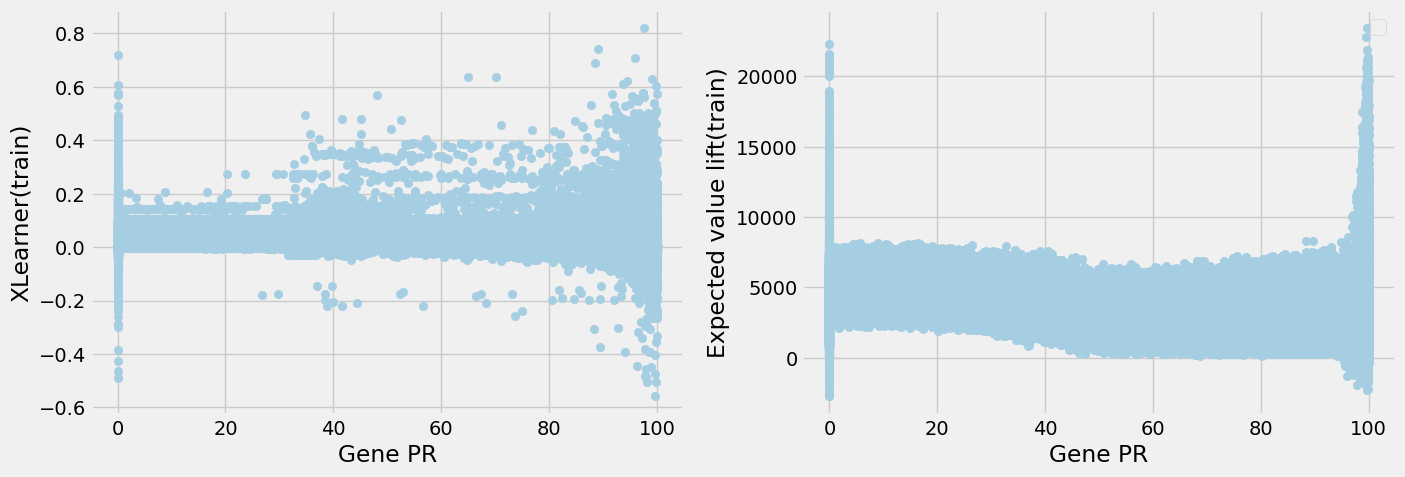

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.scatter(res.iloc[:,0], res['X_te'], label="Uplift")
plt.xlabel('Gene PR')
plt.ylabel('XLearner(train)')
plt.subplot(122)
plt.scatter(res.iloc[:,0],train['Gi'])
plt.xlabel('Gene PR')
plt.ylabel('Expected value lift(train)')
plt.legend()

In [ ]:
from causalml.metrics import plot_gain, get_cumgain, auuc_score
T =res[['換匯發送名單','跨售行為',	'Uplift_mean']]
auuc_score(T, outcome_col='跨售行為', treatment_col='換匯發送名單', normalize=False, random_seed=42)

Uplift_mean    15171.583431
Random         13690.256270
dtype: float64

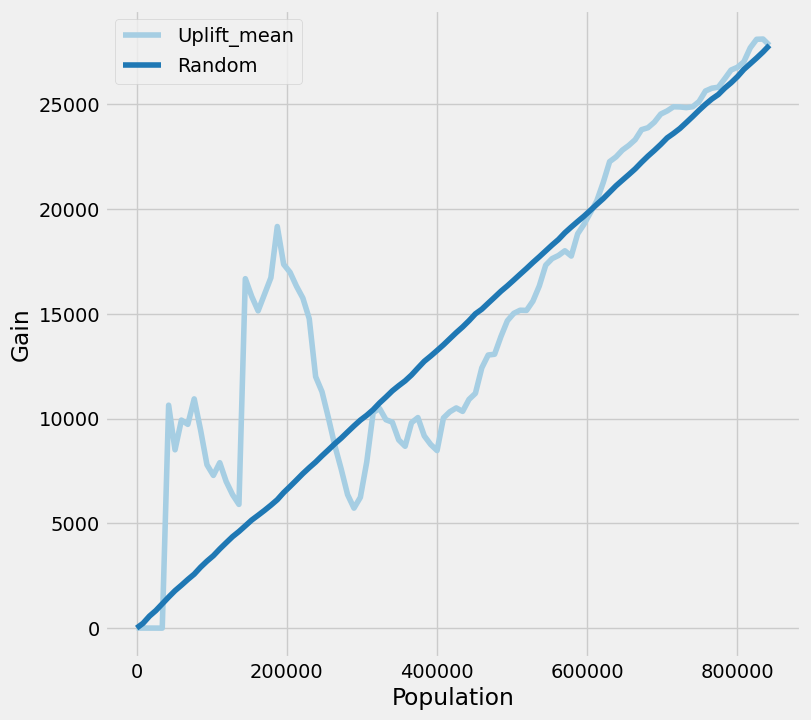

In [ ]:
from causalml.metrics import plot_gain, get_cumgain
T = res
T =T[['換匯發送名單','跨售行為',	'Uplift_mean']]
plot_gain(T, outcome_col='跨售行為', treatment_col='換匯發送名單', normalize=False, random_seed=10)

In [ ]:
from causalml.metrics import plot_gain, get_cumgain, auuc_score
T =res[['換匯發送名單','跨售行為',	'X_te']]
auuc_score(T, outcome_col='跨售行為', treatment_col='換匯發送名單', normalize=False, random_seed=42)

X_te      24353.424313
Random    13690.256270
dtype: float64

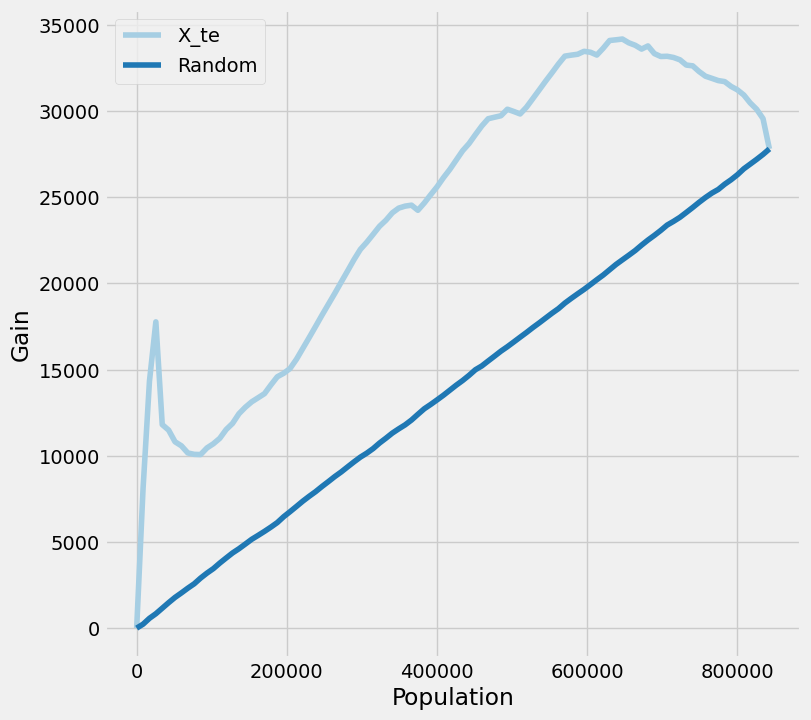

In [ ]:
from causalml.metrics import plot_gain, get_cumgain
T = res
T =T[['換匯發送名單','跨售行為',	'X_te']]
plot_gain(T, outcome_col='跨售行為', treatment_col='換匯發送名單', normalize=False, random_seed=10)

In [ ]:
from causalml.metrics import plot_gain, get_cumgain, auuc_score
T =res[['換匯發送名單','跨售行為',	'X_te_2']]
auuc_score(T, outcome_col='跨售行為', treatment_col='換匯發送名單', normalize=False, random_seed=42)

X_te_2    25170.439711
Random    13690.256270
dtype: float64

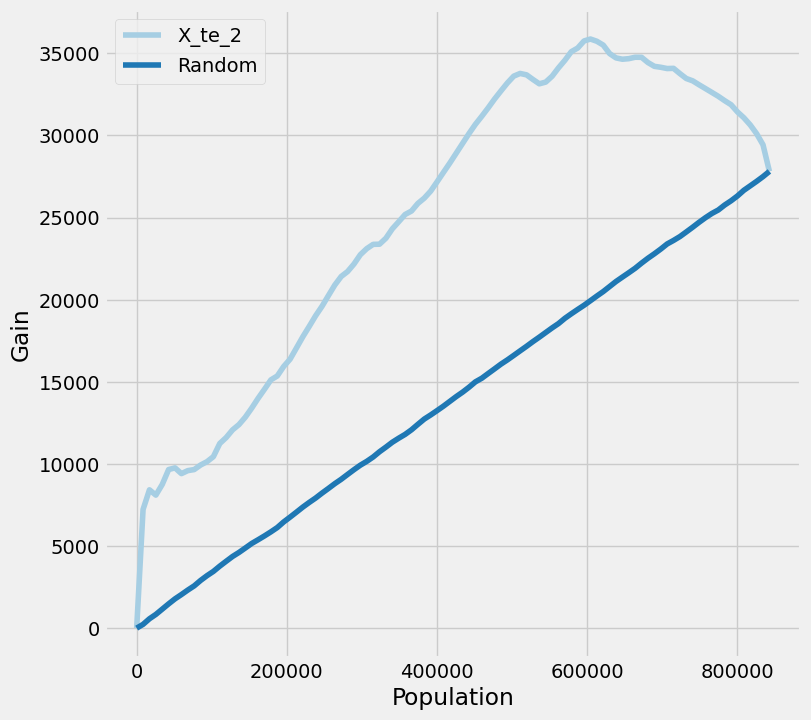

In [ ]:
from causalml.metrics import plot_gain, get_cumgain
T = res
T =T[['換匯發送名單','跨售行為',	'X_te_2']]
plot_gain(T, outcome_col='跨售行為', treatment_col='換匯發送名單', normalize=False, random_seed=10)

In [ ]:
res

,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,X_te,"E(V)|T = 0, D = 1",te,"E(V)|T = 1, D = 1",Uplift_mean|T = 0,Uplift_mean|T = 1,Uplift_mean,X_te_2,Value_X
0,95.6573,0.0,0.0,0.0,0.003857,171877.611205,-15491.582082,156386.029123,0.004392,0.030030,0.025638,0.008651,1352.730902
1,51.2266,0.0,0.0,0.0,0.005216,60231.893431,-16702.654345,43529.239086,0.003726,0.036421,0.032695,0.012721,226.204003
2,0.0000,0.0,0.0,0.0,0.088081,185014.157793,-18722.602433,166291.555359,0.004439,0.029362,0.024923,0.002097,386.355066
3,92.5319,0.0,0.0,0.0,0.009854,105375.134061,-16844.181767,88530.952295,0.004514,0.035176,0.030661,0.012487,415.973861
4,72.7368,0.0,0.0,0.0,0.004691,134203.240261,-17052.090107,117151.150154,0.004213,0.036763,0.032550,0.010406,491.336279
...,...,...,...,...,...,...,...,...,...,...,...,...,...
842527,87.0161,0.0,0.0,0.0,0.003217,92797.450155,-11850.765296,80946.684859,0.005313,0.038764,0.033451,0.005785,241.293678
842528,34.3924,0.0,0.0,0.0,0.006865,100339.262909,-12616.243079,87723.019830,0.002986,0.045579,0.042592,0.014847,225.191728
842529,10.1501,0.0,0.0,0.0,0.004856,95744.788643,-16623.983587,79120.805056,0.001671,0.059648,0.057978,0.011749,223.694338
842530,90.5030,0.0,0.0,0.0,0.003267,112106.141114,-18647.786641,93458.354472,0.003954,0.035925,0.031971,0.008392,769.662736


Value_X    2.161967e+09
Random     1.752383e+09
dtype: float64


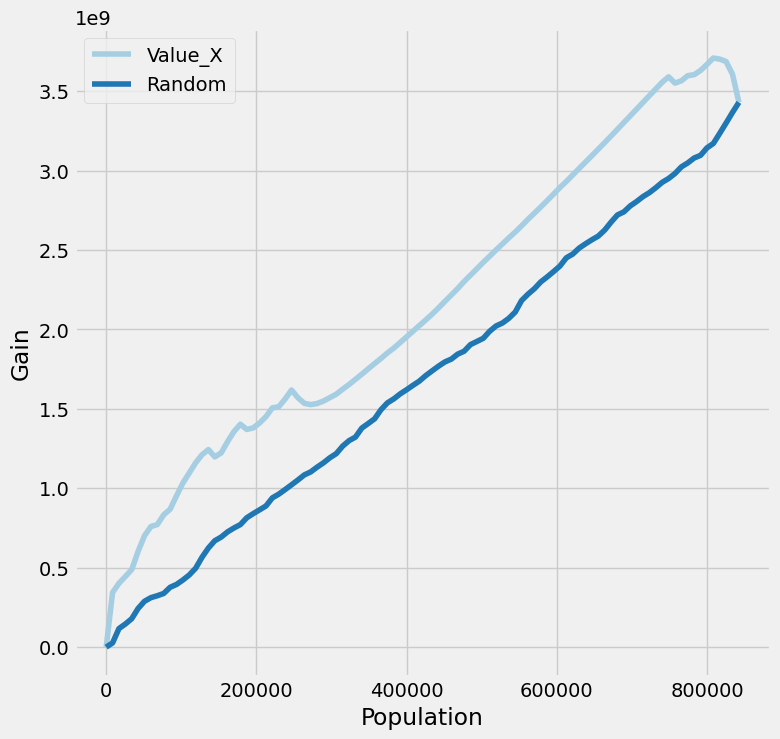

In [ ]:
from causalml.metrics import plot_gain, get_cumgain, auuc_score
T =res[['換匯發送名單','TOTALNTAMOUNT',	'Value_X']]
print(auuc_score(T, outcome_col='TOTALNTAMOUNT', treatment_col='換匯發送名單', normalize=False, random_seed=42))
plot_gain(T, outcome_col='TOTALNTAMOUNT', treatment_col='換匯發送名單', normalize=False, random_seed=10)

Gi        3.710483e+09
Random    1.752383e+09
dtype: float64


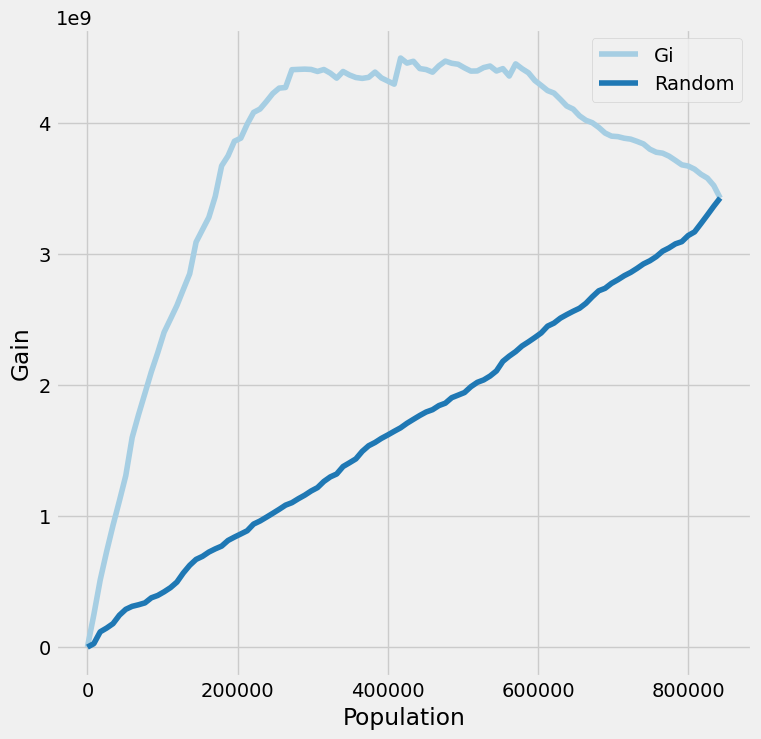

In [ ]:
from causalml.metrics import plot_gain, get_cumgain, auuc_score
T =train[['換匯發送名單','TOTALNTAMOUNT',	'Gi']]
print(auuc_score(T, outcome_col='TOTALNTAMOUNT', treatment_col='換匯發送名單', normalize=False, random_seed=42))
plot_gain(T, outcome_col='TOTALNTAMOUNT', treatment_col='換匯發送名單', normalize=False, random_seed=10)

#Validation

##Econml

In [ ]:
!pip install causalml

  Using cached causalml-0.14.1.tar.gz (909 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 42.1 MB/s eta 0:00:00
  Using cached scikit_learn-1.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.5 MB)
  Using cached Cython-0.29.34-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.2/522.2 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.8/732.8 kB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.2 MB/s eta 0:00:00
INFO: pip is looking a

In [ ]:
#Get all results from 3 Model
import pickle

def get_results(i, df):
  l = pickle.load(open("/content/drive/MyDrive/Model/CasualML_uplift_202306_"+ str(i) +".pkl", "rb"))
  df_res = l.predict(val_data[X_names].values, full_output=True)
  df['Uplift_'+ str(i)+'|T=0'] = df_res.iloc[:,0]
  df['Uplift_'+ str(i)+'|T=1'] = df_res.iloc[:,1]
  print('Finish running uplift_202306_'+ str(i))

  return df

In [ ]:
%%time
r = pd.DataFrame()
T = ['Uplift_1|T=0', 'Uplift_2|T=0', 'Uplift_3|T=0', 'Uplift_4|T=0', 'Uplift_5|T=0']
T1 = ['Uplift_1|T=1', 'Uplift_2|T=1', 'Uplift_3|T=1', 'Uplift_4|T=1', 'Uplift_5|T=1']
for i in range(1,6):
  get_results(i, r)
res['Uplift_mean|T = 0'] = r[T].mean(axis=1)
res['Uplift_mean|T = 1'] = r[T1].mean(axis=1)
res['Uplift_mean'] = res['Uplift_mean|T = 1']-res['Uplift_mean|T = 0']

res

Finish running uplift_202306_1
Finish running uplift_202306_2
Finish running uplift_202306_3
Finish running uplift_202306_4
Finish running uplift_202306_5
CPU times: user 2min 8s, sys: 6.1 s, total: 2min 14s
Wall time: 2min 17s


,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,X_te,"E(V)|T = 0, D = 1",te,"E(V)|T = 1, D = 1",Uplift_mean|T = 0,Uplift_mean|T = 1,Uplift_mean
0,6.9036,0.0,0.0,0.0,0.004841,114731.715825,-17198.235053,97533.480772,0.001174,0.061952,0.060778
1,0.0000,0.0,0.0,0.0,0.007362,114298.733793,-17537.126548,96761.607245,0.002348,0.050205,0.047857
2,47.7786,0.0,0.0,0.0,0.004858,84763.054695,-18026.229042,66736.825653,0.002550,0.053868,0.051318
3,11.2181,0.0,0.0,0.0,0.002281,117698.921131,-15260.775616,102438.145515,0.001821,0.049290,0.047469
4,1.1168,0.0,0.0,0.0,0.004846,100514.179724,-17583.540710,82930.639014,0.001615,0.056164,0.054549
...,...,...,...,...,...,...,...,...,...,...,...
210629,52.9314,0.0,0.0,0.0,0.004852,98703.599864,-18665.274838,80038.325027,0.002118,0.053731,0.051613
210630,70.3247,0.0,0.0,0.0,0.000340,101816.516514,-17301.456209,84515.060305,0.003613,0.039290,0.035677
210631,6.2637,0.0,0.0,0.0,0.004841,107918.561230,-18051.850154,89866.711075,0.001135,0.056681,0.055546
210632,44.5523,0.0,0.0,0.0,0.005380,86462.694160,-16507.355576,69955.338584,0.003232,0.040038,0.036806


In [ ]:
#Save model
import pickle
# Open a file and use dump()
with open('/content/drive/MyDrive/Model/EconML_X_202306_new.pkl.pkl', 'rb') as file:
    # A new file will be created
    X_learner = pickle.load(file)

In [ ]:
# Estimate treatment effects on test data
X_te = X_learner.effect(val_data[X_names])
X_te

array([0.00484055, 0.00736202, 0.00485829, ..., 0.00484055, 0.00537955,
       0.00483901])

In [ ]:
#Save model
#EconML_X_202306_new 202306_v3資料 處理換匯金額錯置問題
#EconML_X_202306_new_1.pkl 202306_v3資料 跨售行為改為1/-1
import pickle
#Open a file and use dump()
with open('/content/drive/MyDrive/Model/EconML_X_202306_new_1.pkl', 'rb') as file:
    X_learner = pickle.load(file)

In [ ]:
# Estimate treatment effects on test data
X = X_learner.effect(val_data[X_names])
X

array([0.00991797, 0.01352111, 0.00995229, ..., 0.00991922, 0.01342904,
       0.01168947])

In [ ]:
res['X_te_2'] = X

In [ ]:
#Save model
import pickle
#Value_EconML_X_202304.pkl One stage X Learner
with open('/content/drive/MyDrive/Model/Value_EconML_X_202306.pkl', 'rb') as file:
    # A new file will be created
    X_learner_value = pickle.load(file)

In [ ]:
# Estimate treatment effects on test data
X = X_learner_value.effect(val_data[X_names])
X

array([395.60345816, 492.01044602, 224.09939344, ..., 223.35682957,
       225.46309363, 225.00324641])

In [ ]:
res['Value_X'] = X
res.head()

,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,X_te,"E(V)|T = 0, D = 1",te,"E(V)|T = 1, D = 1",Uplift_mean|T = 0,Uplift_mean|T = 1,Uplift_mean,X_te_2,Value_X
0,6.9036,0.0,0.0,0.0,0.004841,114731.715825,-17198.235053,97533.480772,0.001174,0.061952,0.060778,0.009918,395.603458
1,0.0000,0.0,0.0,0.0,0.007362,114298.733793,-17537.126548,96761.607245,0.002348,0.050205,0.047857,0.013521,492.010446
2,47.7786,0.0,0.0,0.0,0.004858,84763.054695,-18026.229042,66736.825653,0.002550,0.053868,0.051318,0.009952,224.099393
3,11.2181,0.0,0.0,0.0,0.002281,117698.921131,-15260.775616,102438.145515,0.001821,0.049290,0.047469,0.015855,223.496640
4,1.1168,0.0,0.0,0.0,0.004846,100514.179724,-17583.540710,82930.639014,0.001615,0.056164,0.054549,0.011726,223.412998


In [ ]:
#Save model
import pickle
# Open a file and use dump()
with open('/content/drive/MyDrive/Model/Econml_RF_202306_new.pkl', 'rb') as file:
    # A new file will be created
    est_2 = pickle.load(file)

In [ ]:
t_pred = est_2.predict(val_data[X_names])
t_pred

array([[114731.71582519],
       [114298.73379299],
       [ 84763.05469537],
       ...,
       [107918.56122988],
       [ 86462.69415981],
       [109541.83619701]])

In [ ]:
#Save model
import pickle
# Open a file and use dump()
with open('/content/drive/MyDrive/Model/Econml_CF_202306_new.pkl', 'rb') as file:
    est = pickle.load(file)

In [ ]:
# Get treatment effect and its confidence interval
te_pred = est.effect(val_data[X_names])
te_pred

array([-17198.23505304, -17537.12654822, -18026.22904202, ...,
       -18051.85015444, -16507.35557585, -17266.36858707])

In [ ]:
res = pd.DataFrame()
res = val_data[['換匯基因標籤','換匯發送名單','TOTALNTAMOUNT', '跨售行為']].reset_index(drop = True)
res['X_te'] = X_te
res['E(V)|T = 0, D = 1'] = t_pred
res['te'] = te_pred
res['E(V)|T = 1, D = 1'] = res['E(V)|T = 0, D = 1'] + res['te']
res

,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,X_te,"E(V)|T = 0, D = 1",te,"E(V)|T = 1, D = 1"
0,6.9036,0.0,0.0,0.0,0.004841,114731.715825,-17198.235053,97533.480772
1,0.0000,0.0,0.0,0.0,0.007362,114298.733793,-17537.126548,96761.607245
2,47.7786,0.0,0.0,0.0,0.004858,84763.054695,-18026.229042,66736.825653
3,11.2181,0.0,0.0,0.0,0.002281,117698.921131,-15260.775616,102438.145515
4,1.1168,0.0,0.0,0.0,0.004846,100514.179724,-17583.540710,82930.639014
...,...,...,...,...,...,...,...,...
210629,52.9314,0.0,0.0,0.0,0.004852,98703.599864,-18665.274838,80038.325027
210630,70.3247,0.0,0.0,0.0,0.000340,101816.516514,-17301.456209,84515.060305
210631,6.2637,0.0,0.0,0.0,0.004841,107918.561230,-18051.850154,89866.711075
210632,44.5523,0.0,0.0,0.0,0.005380,86462.694160,-16507.355576,69955.338584


In [ ]:
res.to_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_validation_202306_results_new.csv')
#205804 rows × 11 columns

In [4]:
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_validation_202306_results_new.csv', index_col = 0)
res

,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,X_te,"E(V)|T = 0, D = 1",te,"E(V)|T = 1, D = 1",Uplift_mean|T = 0,Uplift_mean|T = 1,Uplift_mean,X_te_2,Value_X
0,6.9036,0.0,0.0,0.0,0.004841,114731.715825,-17198.235053,97533.480772,0.001174,0.061952,0.060778,0.009918,395.603458
1,0.0000,0.0,0.0,0.0,0.007362,114298.733793,-17537.126548,96761.607245,0.002348,0.050205,0.047857,0.013521,492.010446
2,47.7786,0.0,0.0,0.0,0.004858,84763.054695,-18026.229042,66736.825653,0.002550,0.053868,0.051318,0.009952,224.099393
3,11.2181,0.0,0.0,0.0,0.002281,117698.921131,-15260.775616,102438.145515,0.001821,0.049290,0.047469,0.015855,223.496640
4,1.1168,0.0,0.0,0.0,0.004846,100514.179724,-17583.540710,82930.639014,0.001615,0.056164,0.054549,0.011726,223.412998
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210629,52.9314,0.0,0.0,0.0,0.004852,98703.599864,-18665.274838,80038.325027,0.002118,0.053731,0.051613,0.009937,223.819211
210630,70.3247,0.0,0.0,0.0,0.000340,101816.516514,-17301.456209,84515.060305,0.003613,0.039290,0.035677,-0.001600,226.095746
210631,6.2637,0.0,0.0,0.0,0.004841,107918.561230,-18051.850154,89866.711075,0.001135,0.056681,0.055546,0.009919,223.356830
210632,44.5523,0.0,0.0,0.0,0.005380,86462.694160,-16507.355576,69955.338584,0.003232,0.040038,0.036806,0.013429,225.463094


In [5]:
val = res.iloc[:,:5]
val['X_te_2'] = res['X_te_2']
val['E(V)|T = 0, D = 1'] = res['E(V)|T = 0, D = 1']* res['Uplift_mean|T = 0']
val['E(V)|T = 1, D = 1'] = res['E(V)|T = 1, D = 1']* res['Uplift_mean|T = 1']
val['Gi'] = val['E(V)|T = 1, D = 1']-val['E(V)|T = 0, D = 1']
val['Value_X'] = res['Value_X']
#res['Value_mean'] = pred['Value_mean']
val


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,X_te,X_te_2,"E(V)|T = 0, D = 1","E(V)|T = 1, D = 1",Gi,Value_X
0,6.9036,0.0,0.0,0.0,0.004841,0.009918,134.739667,6042.417742,5907.678075,395.603458
1,0.0000,0.0,0.0,0.0,0.007362,0.013521,268.335863,4857.904615,4589.568753,492.010446
2,47.7786,0.0,0.0,0.0,0.004858,0.009952,216.163045,3594.963667,3378.800621,224.099393
3,11.2181,0.0,0.0,0.0,0.002281,0.015855,214.301089,5049.173299,4834.872210,223.496640
4,1.1168,0.0,0.0,0.0,0.004846,0.011726,162.333688,4657.686620,4495.352932,223.412998
...,...,...,...,...,...,...,...,...,...,...
210629,52.9314,0.0,0.0,0.0,0.004852,0.009937,209.045612,4300.509285,4091.463673,223.819211
210630,70.3247,0.0,0.0,0.0,0.000340,-0.001600,367.877158,3320.586524,2952.709366,226.095746
210631,6.2637,0.0,0.0,0.0,0.004841,0.009919,122.458768,5093.697147,4971.238379,223.356830
210632,44.5523,0.0,0.0,0.0,0.005380,0.013429,279.411294,2800.847078,2521.435784,225.463094


In [ ]:
val.to_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_validation_202306_results_all_new.csv')
#val = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Causalml_validation_202306_results_all_new.csv', index_col = 0)
val

,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,X_te,X_te_2,"E(V)|T = 0, D = 1","E(V)|T = 1, D = 1",Gi,Value_X
0,6.9036,0.0,0.0,0.0,0.004841,0.009918,134.739667,6042.417742,5907.678075,395.603458
1,0.0000,0.0,0.0,0.0,0.007362,0.013521,268.335863,4857.904615,4589.568753,492.010446
2,47.7786,0.0,0.0,0.0,0.004858,0.009952,216.163045,3594.963667,3378.800621,224.099393
3,11.2181,0.0,0.0,0.0,0.002281,0.015855,214.301089,5049.173299,4834.872210,223.496640
4,1.1168,0.0,0.0,0.0,0.004846,0.011726,162.333688,4657.686620,4495.352932,223.412998
...,...,...,...,...,...,...,...,...,...,...
210629,52.9314,0.0,0.0,0.0,0.004852,0.009937,209.045612,4300.509285,4091.463673,223.819211
210630,70.3247,0.0,0.0,0.0,0.000340,-0.001600,367.877158,3320.586524,2952.709366,226.095746
210631,6.2637,0.0,0.0,0.0,0.004841,0.009919,122.458768,5093.697147,4971.238379,223.356830
210632,44.5523,0.0,0.0,0.0,0.005380,0.013429,279.411294,2800.847078,2521.435784,225.463094


###Plot

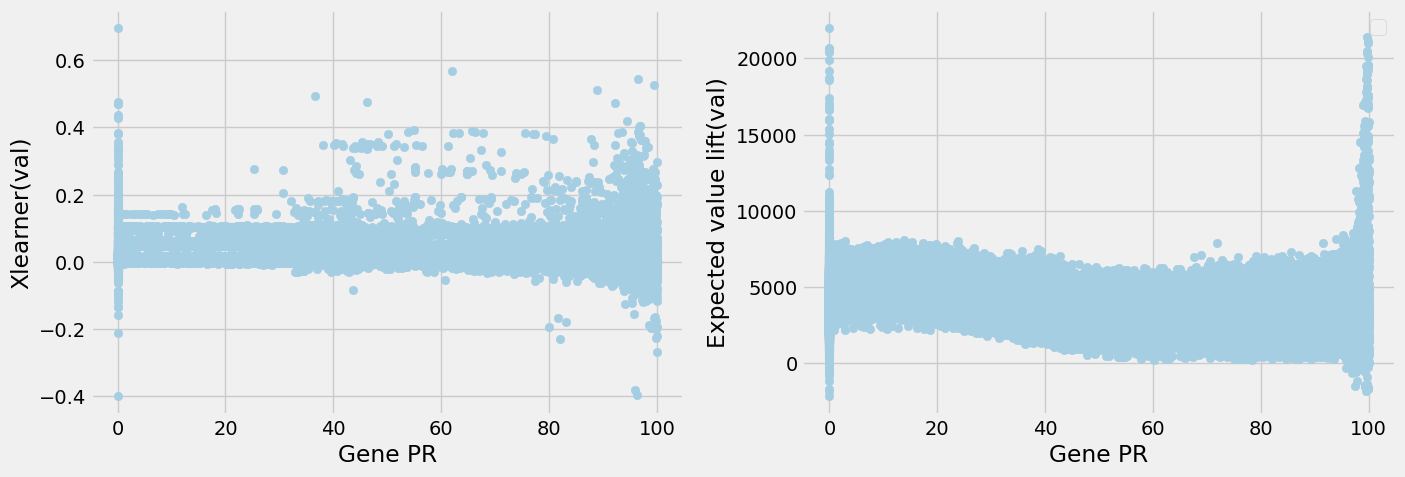

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.scatter(val.iloc[:,0], val['X_te'])
plt.xlabel('Gene PR')
plt.ylabel('Xlearner(val)')
plt.subplot(122)
plt.scatter(val.iloc[:,0], val['Gi'])
plt.xlabel('Gene PR')
plt.ylabel('Expected value lift(val)')
plt.legend()

In [ ]:
from causalml.metrics import plot_gain, get_cumgain
T = val
T =T[['換匯發送名單','跨售行為',	'X_te']]
cumgain = get_cumgain(T, outcome_col='跨售行為', treatment_col='換匯發送名單', normalize=False, random_seed=42)
cumgain

,X_te,Random
0,0.000000,0.000000
1,-0.100000,-0.000154
2,-0.400000,-0.000617
3,-0.900000,-0.001388
4,-1.600000,-0.002468
...,...,...
205800,504.776675,502.725868
205801,503.748004,502.733535
205802,502.719333,502.741201
205803,502.727000,502.727000


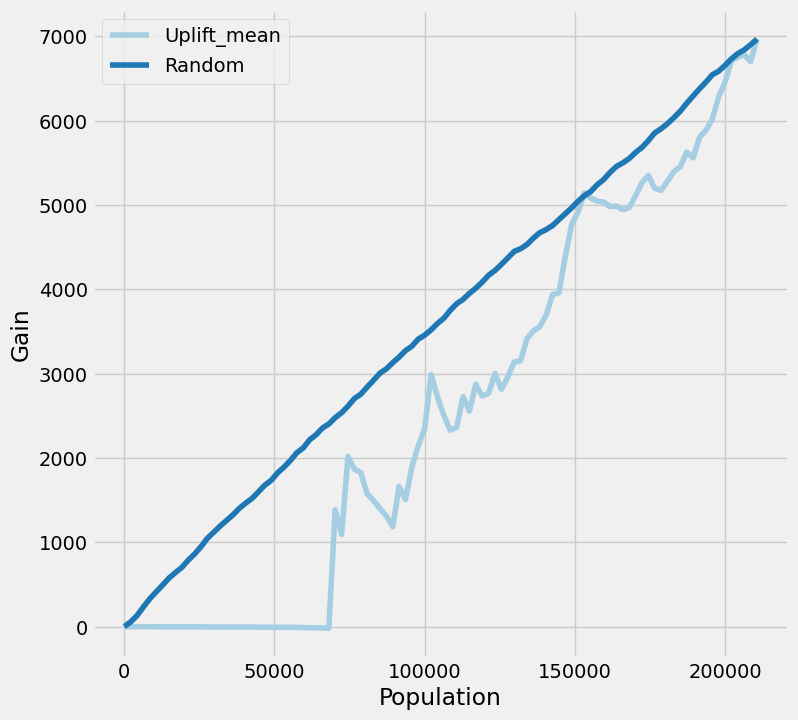

In [ ]:
from causalml.metrics import plot_gain, get_cumgain
T = res
T =T[['換匯發送名單','跨售行為',	'Uplift_mean']]
plot_gain(T, outcome_col='跨售行為', treatment_col='換匯發送名單', normalize=False, random_seed=22)

X_te      3946.160249
Random    3419.758296
dtype: float64


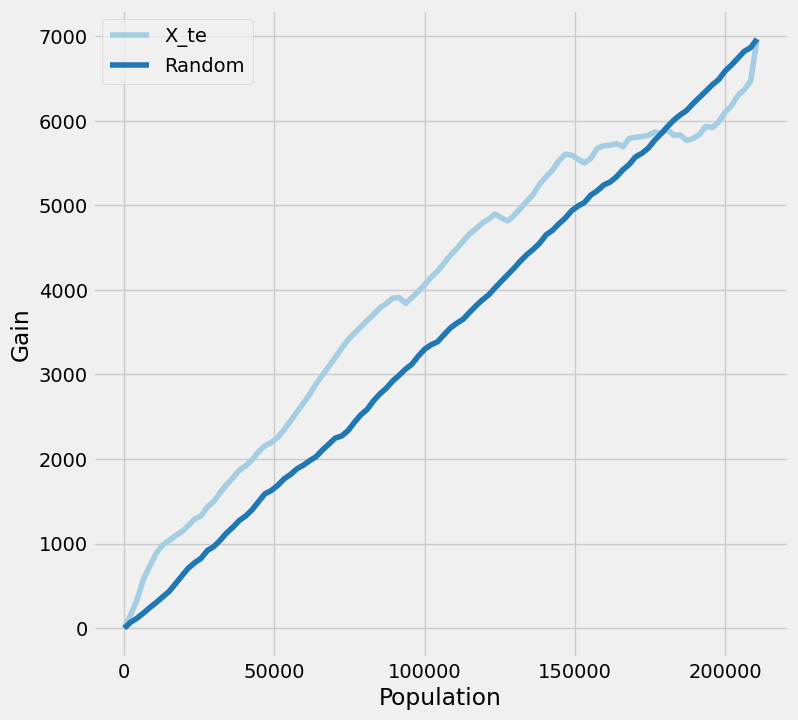

In [ ]:
from causalml.metrics import plot_gain, get_cumgain
T = res[['換匯發送名單','跨售行為',	'X_te']]
print(auuc_score(T, outcome_col='跨售行為', treatment_col='換匯發送名單', normalize=False, random_seed=42))
plot_gain(T, outcome_col='跨售行為', treatment_col='換匯發送名單', normalize=False, random_seed=4)

X_te_2    4220.317279
Random    3419.758296
dtype: float64


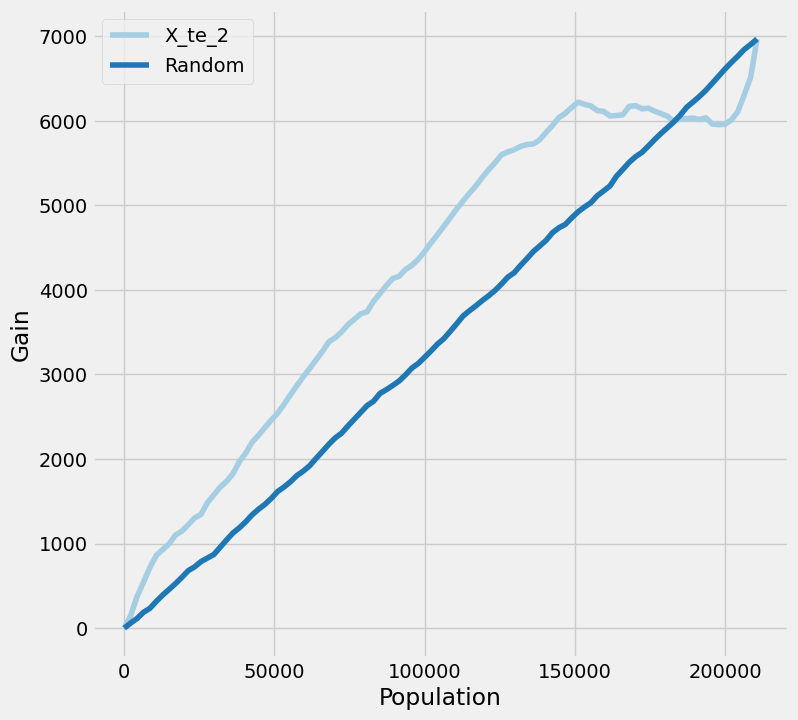

In [ ]:
from causalml.metrics import plot_gain, get_cumgain
T = res[['換匯發送名單','跨售行為',	'X_te_2']]
print(auuc_score(T, outcome_col='跨售行為', treatment_col='換匯發送名單', normalize=False, random_seed=42))
plot_gain(T, outcome_col='跨售行為', treatment_col='換匯發送名單', normalize=False, random_seed=42)

Value_X    3.315659e+08
Random     3.543110e+08
dtype: float64


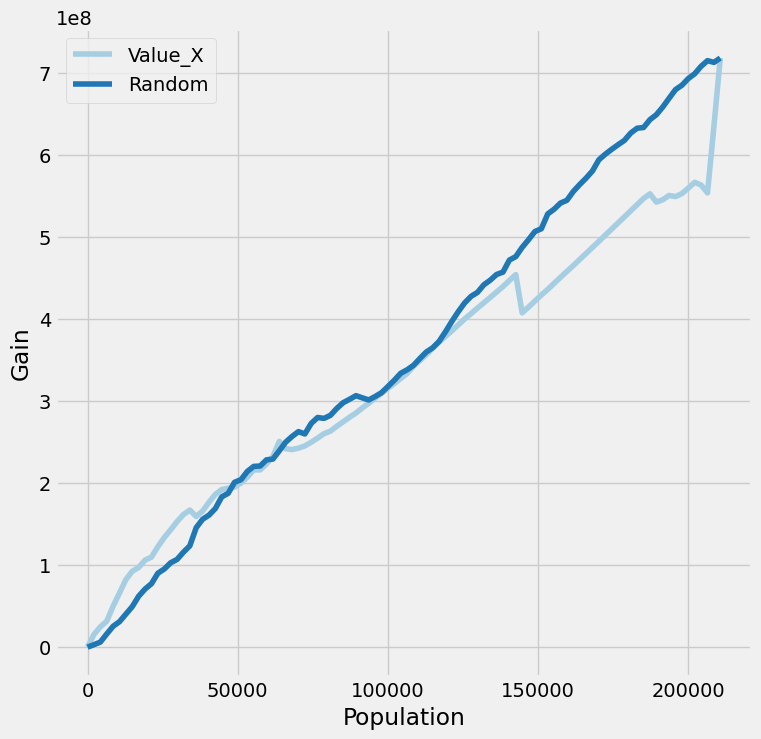

In [6]:
from causalml.metrics import plot_gain, get_cumgain, auuc_score
T =res[['換匯發送名單','TOTALNTAMOUNT',	'Value_X']]
print(auuc_score(T, outcome_col='TOTALNTAMOUNT', treatment_col='換匯發送名單', normalize=False, random_seed=200))
plot_gain(T, outcome_col='TOTALNTAMOUNT', treatment_col='換匯發送名單', normalize=False, random_seed=200)

Gi        6.268968e+08
Random    3.543110e+08
dtype: float64


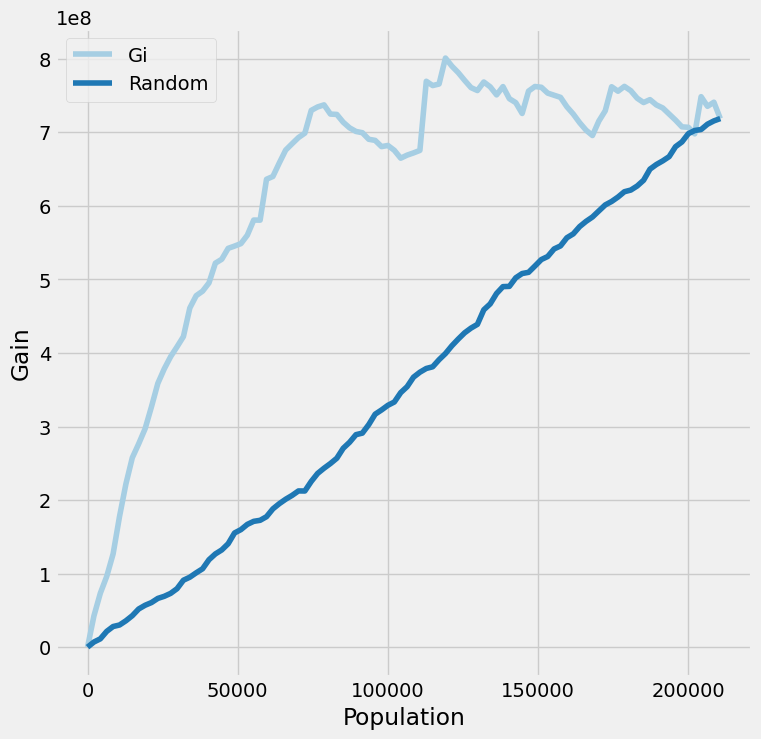

In [7]:
from causalml.metrics import plot_gain, get_cumgain, auuc_score
T =val[['換匯發送名單','TOTALNTAMOUNT',	'Gi']]
print(auuc_score(T, outcome_col='TOTALNTAMOUNT', treatment_col='換匯發送名單', normalize=False, random_seed=42))
plot_gain(T, outcome_col='TOTALNTAMOUNT', treatment_col='換匯發送名單', normalize=False, random_seed=42)

In [ ]:
val

,換匯基因標籤,換匯發送名單,TOTALNTAMOUNT,跨售行為,X_te,X_te_2,"E(V)|T = 0, D = 1","E(V)|T = 1, D = 1",Gi,Value_X
0,6.9036,0.0,0.0,0.0,0.004841,0.009918,134.739667,6042.417742,5907.678075,395.603458
1,0.0000,0.0,0.0,0.0,0.007362,0.013521,268.335863,4857.904615,4589.568753,492.010446
2,47.7786,0.0,0.0,0.0,0.004858,0.009952,216.163045,3594.963667,3378.800621,224.099393
3,11.2181,0.0,0.0,0.0,0.002281,0.015855,214.301089,5049.173299,4834.872210,223.496640
4,1.1168,0.0,0.0,0.0,0.004846,0.011726,162.333688,4657.686620,4495.352932,223.412998
...,...,...,...,...,...,...,...,...,...,...
210629,52.9314,0.0,0.0,0.0,0.004852,0.009937,209.045612,4300.509285,4091.463673,223.819211
210630,70.3247,0.0,0.0,0.0,0.000340,-0.001600,367.877158,3320.586524,2952.709366,226.095746
210631,6.2637,0.0,0.0,0.0,0.004841,0.009919,122.458768,5093.697147,4971.238379,223.356830
210632,44.5523,0.0,0.0,0.0,0.005380,0.013429,279.411294,2800.847078,2521.435784,225.463094


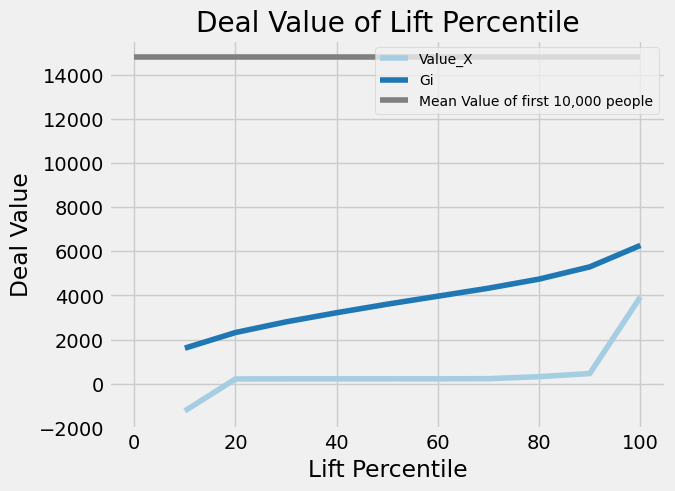

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 根据不同列值排序的字典
columns_to_sort = {
   "Value_X": "Value_X",
   "Gi": "Gi"
}

# 计算Lift值的百分位数
percentiles = range(10, 110, 10)

# 创建字典用于存储不同列的成交率
conversion_rates = {column: [] for column in columns_to_sort}

for col, label in columns_to_sort.items():
   for percentile in percentiles:
       lower_bound = np.percentile(val[col], percentile - 10)
       upper_bound = np.percentile(val[col], percentile)
       subset = val[(val[col] <= upper_bound) & (val[col] > lower_bound)]
       conversion_rate = (subset[col].sum()/len(subset))
       conversion_rates[label].append(conversion_rate)

# 前5000人跨售金額平均
S = val['TOTALNTAMOUNT'].sort_values(ascending=False)[:10000].mean()

# 绘制折线图
fig, ax = plt.subplots()
for label, rates in conversion_rates.items():
   ax.plot(percentiles, rates, label=label)

ax.hlines(y=S, xmin=0.0, xmax=100, color='grey', label='Mean Value of first 10,000 people')
plt.legend(fontsize=10, loc="upper right")
plt.xlabel("Lift Percentile")
plt.ylabel("Deal Value")
plt.title("Deal Value of Lift Percentile")
plt.show()

#Uplift and Proft prediction


*  **Uplift**
  * Model:  CausalML_uplift_1.pkl, CausalML_uplift_2.pkl, CausalML_uplift_3.pkl
  * Data: data202308.csv
  * Prediction: Casualml_prediction.csv

* **X-Learner**
  * Model:  EconML_X_202306.pkl
  * Data: data202308.csv

*   **Profit**
  * Model:  EEconml_RF_202306.pkl, Econml_CF_202306.pkl
  * Data: data202308.csv



In [ ]:
import zipfile

# Specify the path to the zip file
#zip_file_path = 'data202305.csv.zip'
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202308_v1.csv.zip'


# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [ ]:
import pandas as pd
import numpy as np

# Load your May data
aug_data = pd.read_csv('/content/data202308_v1.csv', index_col=0)
#aug_data = subsets[0]
unino = aug_data['UNINO']
aug_data = aug_data.drop('UNINO', axis='columns')

aug_data.columns
#length=201

Index(['年齡', '公司戶記號', '性別', '呆帳記號_含信用卡', '客戶年收入', '網路會員記號', '網路使用記號_行動銀行',
       '小mma記號', '網路服務記號', '網路使用記號',
       ...
       '客戶行業別_醫療保健', '客戶行業別_金融業', '客戶行業別_電子業', '對帳單寄送記號_0', '對帳單寄送記號_1',
       '對帳單寄送記號_2', '信用卡VIP客戶註記_Y', '外幣存款記號_Y', '信用卡轉呆記號_Y', '信用卡自動扣款記號_Y'],
      dtype='object', length=201)

In [ ]:
#Get all results from 5 Model
import pickle

def get_results(i, df):
  l = pickle.load(open("/content/drive/MyDrive/Model/CasualML_uplift_202306_"+ str(i) +".pkl", "rb"))
  df_res = l.predict(aug_data, full_output=True)
  df['Uplift_'+ str(i)+'|T=0'] = df_res.iloc[:,0]
  df['Uplift_'+ str(i)+'|T=1'] = df_res.iloc[:,1]
  print('Finish running uplift_new_'+ str(i))

  return df

In [ ]:
%%time
res = pd.DataFrame()
pred = pd.DataFrame()
T = ['Uplift_1|T=0', 'Uplift_2|T=0', 'Uplift_3|T=0', 'Uplift_4|T=0', 'Uplift_5|T=0']
T1 = ['Uplift_1|T=1', 'Uplift_2|T=1', 'Uplift_3|T=1', 'Uplift_4|T=1', 'Uplift_5|T=1']
for i in range(1,6):
  get_results(i, res)
pred['Uplift_mean|T = 0'] = res[T].mean(axis=1)
pred['Uplift_mean|T = 1'] = res[T1].mean(axis=1)
pred['Uplift_mean'] = pred['Uplift_mean|T = 1']-pred['Uplift_mean|T = 0']

pred

Finish running uplift_new_1
Finish running uplift_new_2
Finish running uplift_new_3
Finish running uplift_new_4
Finish running uplift_new_5
CPU times: user 10min 28s, sys: 47.1 s, total: 11min 15s
Wall time: 11min 44s


,Uplift_mean|T = 0,Uplift_mean|T = 1,Uplift_mean
0,0.001373,0.048074,0.046701
1,0.003127,0.043591,0.040463
2,0.001788,0.050031,0.048243
3,0.002848,0.056080,0.053232
4,0.001631,0.062387,0.060756
...,...,...,...
1054428,0.003953,0.037444,0.033491
1054429,0.004097,0.034036,0.029939
1054430,0.001663,0.055808,0.054145
1054431,0.005949,0.037284,0.031335


In [ ]:
!pip install --upgrade DecisionTreeClassifier
!pip install scikit-learn==1.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 54.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.10.0 requires pandas>=1.5.0, but you have pandas 1.3.5 which is incompatible.
causalml 0.14.1 requires scikit-learn<=1.0.2, but you have scikit-learn 1.2.2 which is incompatible.


In [ ]:
import pickle
with open('/content/drive/MyDrive/Model/EconML_X_202306_new.pkl', 'rb') as file:
    X_learner = pickle.load(file)

In [ ]:
# Estimate treatment effects on test data
X_te = X_learner.effect(aug_data)
X_te

array([0.00485739, 0.00526825, 0.00489447, ..., 0.00484532, 0.00276364,
       0.00439111])

In [ ]:
pred['X_te'] = X_te
pred

,UNINO,換匯基因標籤,Uplift_mean|T = 0,Uplift_mean|T = 1,Uplift_mean,X_te
0,A1521309050,0.0059,0.001373,0.048074,0.046701,0.004857
1,A1521310270,43.1608,0.003127,0.043591,0.040463,0.005268
2,A1521312590,2.4923,0.001788,0.050031,0.048243,0.004894
3,A1521318940,66.0665,0.002848,0.056080,0.053232,0.006392
4,A1521321420,15.3138,0.001631,0.062387,0.060756,0.001691
...,...,...,...,...,...,...
1054428,Y2729821390,0.0000,0.003953,0.037444,0.033491,0.006932
1054429,Y2729821750,86.4484,0.004097,0.034036,0.029939,0.004487
1054430,Y2729823350,25.8643,0.001663,0.055808,0.054145,0.004845
1054431,Y2729824530,0.0000,0.005949,0.037284,0.031335,0.002764


In [ ]:
#pred['換匯基因標籤'] = aug_data.iloc[:,-4].values
#pred = pd.DataFrame()
pred.insert(0, '換匯基因標籤', aug_data['換匯基因標籤'].values)
pred.insert(0, 'UNINO', unino.values)
#pred.insert(2, '換匯發送名單', aug_data['換匯發送名單'].values)
#pred.insert(3, '換匯金額', aug_data['TOTALNTAMOUNT'].values)
#pred.insert(4, '跨售行為', aug_data['跨售行為'].values)
pred

,UNINO,換匯基因標籤,Uplift_mean|T = 0,Uplift_mean|T = 1,Uplift_mean
0,A1521309050,0.0059,0.001373,0.048074,0.046701
1,A1521310270,43.1608,0.003127,0.043591,0.040463
2,A1521312590,2.4923,0.001788,0.050031,0.048243
3,A1521318940,66.0665,0.002848,0.056080,0.053232
4,A1521321420,15.3138,0.001631,0.062387,0.060756
...,...,...,...,...,...
1054428,Y2729821390,0.0000,0.003953,0.037444,0.033491
1054429,Y2729821750,86.4484,0.004097,0.034036,0.029939
1054430,Y2729823350,25.8643,0.001663,0.055808,0.054145
1054431,Y2729824530,0.0000,0.005949,0.037284,0.031335


In [ ]:
#Save model
#EconML_X_202306_new_1.pkl 202304_v2資料 跨售行為改為1/-1
import pickle
#Open a file and use dump()
with open('/content/drive/MyDrive/Model/EconML_X_202306_new_1.pkl', 'rb') as file:
    X_learner = pickle.load(file)

In [ ]:
# Estimate treatment effects on test data
X1 = X_learner.effect(aug_data)
X1

array([ 0.0117543 ,  0.01285994,  0.01181438, ...,  0.01142055,
       -0.00055989,  0.01114007])

In [ ]:
#Save model
import pickle
#Value_EconML_X_202304.pkl One stage X Learner
with open('/content/drive/MyDrive/Model/Value_EconML_X_202306.pkl', 'rb') as file:
    # A new file will be created
    X_learner_value = pickle.load(file)

In [ ]:
# Estimate treatment effects on test data
X2 = X_learner_value.effect(aug_data)
X2

array([223.70591308, 225.40240249, 224.87329608, ...,  55.53330959,
       343.29066201, 282.82649277])

In [ ]:
pred['X_te_2'] = X1
pred['Value_X'] = X2
pred.head()

,UNINO,換匯基因標籤,Uplift_mean|T = 0,Uplift_mean|T = 1,Uplift_mean,X_te,"E(V)|T = 0, D = 1",te,"E(V)|T = 1, D = 1",X_te_2,Value_X
0,A1521309050,0.0059,0.001373,0.048074,0.046701,0.004857,88067.946333,-18086.505294,69981.441039,0.011754,223.705913
1,A1521310270,43.1608,0.003127,0.043591,0.040463,0.005268,68208.224027,-16562.628867,51645.595160,0.012860,225.402402
2,A1521312590,2.4923,0.001788,0.050031,0.048243,0.004894,91168.411721,-17048.049118,74120.362603,0.011814,224.873296
3,A1521318940,66.0665,0.002848,0.056080,0.053232,0.006392,103617.724284,-17359.005021,86258.719263,0.016154,491.291660
4,A1521321420,15.3138,0.001631,0.062387,0.060756,0.001691,118600.440766,-19618.657805,98981.782961,0.014543,223.320797


In [ ]:
#Save model
import pickle
# Open a file and use dump()
with open('/content/drive/MyDrive/Model/Econml_RF_202306_new.pkl', 'rb') as file:
    est2 = pickle.load(file)

In [ ]:
%%time
Econml_RF = est2.predict(aug_data)
Econml_RF

CPU times: user 1min 1s, sys: 648 ms, total: 1min 1s
Wall time: 1min 6s


array([[ 88067.94633334],
       [ 68208.22402695],
       [ 91168.4117208 ],
       ...,
       [135709.48150938],
       [ 41756.85403054],
       [136461.72609684]])

In [ ]:
#Save model
import pickle
# Open a file and use dump()
with open('/content/drive/MyDrive/Model/Econml_CF_202306_new.pkl', 'rb') as file:
    # A new file will be created
    est1 = pickle.load(file)

In [ ]:
%%time
Econml_CF_DML = est1.effect(aug_data)
Econml_CF_DML

CPU times: user 53.9 s, sys: 8.85 s, total: 1min 2s
Wall time: 1min


array([-18086.50529388, -16562.62886693, -17048.04911767, ...,
       -19017.10602439, -16981.3563438 , -17840.13199345])

In [ ]:
pred['E(V)|T = 0, D = 1'] = Econml_RF
pred['te'] = Econml_CF_DML
pred['E(V)|T = 1, D = 1'] = pred['E(V)|T = 0, D = 1'] + pred['te']
pred

,UNINO,換匯基因標籤,Uplift_mean|T = 0,Uplift_mean|T = 1,Uplift_mean,X_te,"E(V)|T = 0, D = 1",te,"E(V)|T = 1, D = 1"
0,A1521309050,0.0059,0.001373,0.048074,0.046701,0.004857,88067.946333,-18086.505294,69981.441039
1,A1521310270,43.1608,0.003127,0.043591,0.040463,0.005268,68208.224027,-16562.628867,51645.595160
2,A1521312590,2.4923,0.001788,0.050031,0.048243,0.004894,91168.411721,-17048.049118,74120.362603
3,A1521318940,66.0665,0.002848,0.056080,0.053232,0.006392,103617.724284,-17359.005021,86258.719263
4,A1521321420,15.3138,0.001631,0.062387,0.060756,0.001691,118600.440766,-19618.657805,98981.782961
...,...,...,...,...,...,...,...,...,...
1054428,Y2729821390,0.0000,0.003953,0.037444,0.033491,0.006932,111131.614951,-18184.741163,92946.873788
1054429,Y2729821750,86.4484,0.004097,0.034036,0.029939,0.004487,111857.440722,-27972.861372,83884.579350
1054430,Y2729823350,25.8643,0.001663,0.055808,0.054145,0.004845,135709.481509,-19017.106024,116692.375485
1054431,Y2729824530,0.0000,0.005949,0.037284,0.031335,0.002764,41756.854031,-16981.356344,24775.497687


In [ ]:
pred.to_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_202308_new.csv')
#1054433 rows × 9 columns

In [ ]:
import pandas as pd
pred = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_202308_new.csv', index_col = 0)
pred

,UNINO,換匯基因標籤,Uplift_mean|T = 0,Uplift_mean|T = 1,Uplift_mean,X_te,"E(V)|T = 0, D = 1",te,"E(V)|T = 1, D = 1"
0,A1521309050,0.0059,0.001373,0.048074,0.046701,0.004857,88067.946333,-18086.505294,69981.441039
1,A1521310270,43.1608,0.003127,0.043591,0.040463,0.005268,68208.224027,-16562.628867,51645.595160
2,A1521312590,2.4923,0.001788,0.050031,0.048243,0.004894,91168.411721,-17048.049118,74120.362603
3,A1521318940,66.0665,0.002848,0.056080,0.053232,0.006392,103617.724284,-17359.005021,86258.719263
4,A1521321420,15.3138,0.001631,0.062387,0.060756,0.001691,118600.440766,-19618.657805,98981.782961
...,...,...,...,...,...,...,...,...,...
1054428,Y2729821390,0.0000,0.003953,0.037444,0.033491,0.006932,111131.614951,-18184.741163,92946.873788
1054429,Y2729821750,86.4484,0.004097,0.034036,0.029939,0.004487,111857.440722,-27972.861372,83884.579350
1054430,Y2729823350,25.8643,0.001663,0.055808,0.054145,0.004845,135709.481509,-19017.106024,116692.375485
1054431,Y2729824530,0.0000,0.005949,0.037284,0.031335,0.002764,41756.854031,-16981.356344,24775.497687


In [ ]:
pred.describe()

,換匯基因標籤,Uplift_mean|T = 0,Uplift_mean|T = 1,Uplift_mean,X_te,"E(V)|T = 0, D = 1",te,"E(V)|T = 1, D = 1"
count,1.054433e+06,1.054433e+06,1.054433e+06,1.054433e+06,1.054433e+06,1.054433e+06,1.054433e+06,1.054433e+06
mean,4.764068e+01,2.880118e-03,4.425563e-02,4.137551e-02,7.287296e-03,1.112805e+05,-1.757006e+04,9.371040e+04
std,3.019562e+01,1.463678e-03,8.487338e-03,9.545917e-03,1.875801e-02,2.950705e+04,6.649850e+03,2.952517e+04
min,0.000000e+00,7.996501e-04,1.596074e-02,-9.112811e-03,-4.422002e-01,2.445476e+04,-1.048962e+05,6.545673e+03
25%,2.121890e+01,1.708004e-03,3.766452e-02,3.398898e-02,3.369724e-03,9.399464e+04,-1.839117e+04,7.688579e+04
50%,4.766060e+01,2.761591e-03,4.140432e-02,3.879149e-02,4.394518e-03,1.093627e+05,-1.736858e+04,9.210743e+04
75%,7.383320e+01,3.814756e-03,5.210633e-02,4.992623e-02,4.901757e-03,1.238658e+05,-1.642940e+04,1.062325e+05
max,1.000000e+02,3.249452e-02,7.386486e-02,7.263583e-02,8.537941e-01,4.757274e+05,2.450816e+05,6.482646e+05


In [ ]:
res = pd.DataFrame()
res = pred.iloc[:,:8]
res['X_te'] = pred['X_te'].values
res['X_te_2'] = pred['X_te_2']
res['E(V)|X,T = 0'] = pred['Uplift_mean|T = 0'] * pred['E(V)|T = 0, D = 1']
res['E(V)|X,T = 1'] = pred['Uplift_mean|T = 1'] * pred['E(V)|T = 1, D = 1']
res['Gi'] = res['E(V)|X,T = 1']-res['E(V)|X,T = 0']
res['Value_X'] = pred['Value_X']
#res['Value_mean'] = pred['Value_mean']
res

,UNINO,換匯基因標籤,Uplift_mean|T = 0,Uplift_mean|T = 1,Uplift_mean,X_te,"E(V)|T = 0, D = 1",te,X_te_2,"E(V)|X,T = 0","E(V)|X,T = 1",Gi,Value_X
0,A1521309050,0.0059,0.001373,0.048074,0.046701,0.004857,88067.946333,-18086.505294,0.011754,120.900778,3364.284911,3243.384134,223.705913
1,A1521310270,43.1608,0.003127,0.043591,0.040463,0.005268,68208.224027,-16562.628867,0.012860,213.316467,2251.258464,2037.941997,225.402402
2,A1521312590,2.4923,0.001788,0.050031,0.048243,0.004894,91168.411721,-17048.049118,0.011814,162.978677,3708.299031,3545.320354,224.873296
3,A1521318940,66.0665,0.002848,0.056080,0.053232,0.006392,103617.724284,-17359.005021,0.016154,295.100096,4837.414952,4542.314857,491.291660
4,A1521321420,15.3138,0.001631,0.062387,0.060756,0.001691,118600.440766,-19618.657805,0.014543,193.417067,6175.182307,5981.765239,223.320797
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054428,Y2729821390,0.0000,0.003953,0.037444,0.033491,0.006932,111131.614951,-18184.741163,0.007109,439.356425,3480.311736,3040.955312,488.858419
1054429,Y2729821750,86.4484,0.004097,0.034036,0.029939,0.004487,111857.440722,-27972.861372,0.009792,458.271388,2855.056602,2396.785214,460.483859
1054430,Y2729823350,25.8643,0.001663,0.055808,0.054145,0.004845,135709.481509,-19017.106024,0.011421,225.692785,6512.316657,6286.623872,55.533310
1054431,Y2729824530,0.0000,0.005949,0.037284,0.031335,0.002764,41756.854031,-16981.356344,-0.000560,248.414134,923.727788,675.313654,343.290662


In [ ]:
res.to_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_All_202308_new.csv')
#1054433 rows × 9 columns

In [ ]:
res.describe()

,換匯基因標籤,Uplift_mean|T = 0,Uplift_mean|T = 1,Uplift_mean,X_te,"E(V)|T = 0, D = 1",te,X_te_2,"E(V)|X,T = 0","E(V)|X,T = 1",Gi,Value_X
count,1.054433e+06,1.054433e+06,1.054433e+06,1.054433e+06,1.054433e+06,1.054433e+06,1.054433e+06,1.054433e+06,1.054433e+06,1.054433e+06,1.054433e+06,1.054433e+06
mean,4.764068e+01,2.880118e-03,4.425563e-02,4.137551e-02,7.287296e-03,1.112805e+05,-1.757006e+04,1.384543e-02,3.298831e+02,4.141223e+03,3.811340e+03,4.333570e+02
std,3.019562e+01,1.463678e-03,8.487338e-03,9.545917e-03,1.875801e-02,2.950705e+04,6.649850e+03,3.274209e-02,2.784490e+02,1.397625e+03,1.367574e+03,9.589253e+03
min,0.000000e+00,7.996501e-04,1.596074e-02,-9.112811e-03,-4.422002e-01,2.445476e+04,-1.048962e+05,-1.111108e+00,8.254800e+01,2.480173e+02,-2.987235e+03,-6.279616e+05
25%,2.121890e+01,1.708004e-03,3.766452e-02,3.398898e-02,3.369724e-03,9.399464e+04,-1.839117e+04,7.605508e-03,1.910248e+02,3.151694e+03,2.800454e+03,2.234966e+02
50%,4.766060e+01,2.761591e-03,4.140432e-02,3.879149e-02,4.394518e-03,1.093627e+05,-1.736858e+04,9.918928e-03,2.542001e+02,4.120981e+03,3.797286e+03,2.249963e+02
75%,7.383320e+01,3.814756e-03,5.210633e-02,4.992623e-02,4.901757e-03,1.238658e+05,-1.642940e+04,1.175171e-02,3.718194e+02,5.056538e+03,4.727086e+03,3.215383e+02
max,1.000000e+02,3.249452e-02,7.386486e-02,7.263583e-02,8.537941e-01,4.757274e+05,2.450816e+05,1.477521e+00,1.037910e+04,2.517797e+04,2.312124e+04,2.887331e+06


In [2]:
import pandas as pd
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_All_202308_new.csv', index_col = 0)
res

,UNINO,換匯基因標籤,Uplift_mean|T = 0,Uplift_mean|T = 1,Uplift_mean,X_te,"E(V)|T = 0, D = 1",te,X_te_2,"E(V)|X,T = 0","E(V)|X,T = 1",Gi,Value_X
0,A1521309050,0.0059,0.001373,0.048074,0.046701,0.004857,88067.946333,-18086.505294,0.011754,120.900778,3364.284911,3243.384134,223.705913
1,A1521310270,43.1608,0.003127,0.043591,0.040463,0.005268,68208.224027,-16562.628867,0.012860,213.316467,2251.258464,2037.941997,225.402402
2,A1521312590,2.4923,0.001788,0.050031,0.048243,0.004894,91168.411721,-17048.049118,0.011814,162.978677,3708.299031,3545.320354,224.873296
3,A1521318940,66.0665,0.002848,0.056080,0.053232,0.006392,103617.724284,-17359.005021,0.016154,295.100096,4837.414952,4542.314857,491.291660
4,A1521321420,15.3138,0.001631,0.062387,0.060756,0.001691,118600.440766,-19618.657805,0.014543,193.417067,6175.182307,5981.765239,223.320797
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054428,Y2729821390,0.0000,0.003953,0.037444,0.033491,0.006932,111131.614951,-18184.741163,0.007109,439.356425,3480.311736,3040.955312,488.858419
1054429,Y2729821750,86.4484,0.004097,0.034036,0.029939,0.004487,111857.440722,-27972.861372,0.009792,458.271388,2855.056602,2396.785214,460.483859
1054430,Y2729823350,25.8643,0.001663,0.055808,0.054145,0.004845,135709.481509,-19017.106024,0.011421,225.692785,6512.316657,6286.623872,55.533310
1054431,Y2729824530,0.0000,0.005949,0.037284,0.031335,0.002764,41756.854031,-16981.356344,-0.000560,248.414134,923.727788,675.313654,343.290662


##Plot

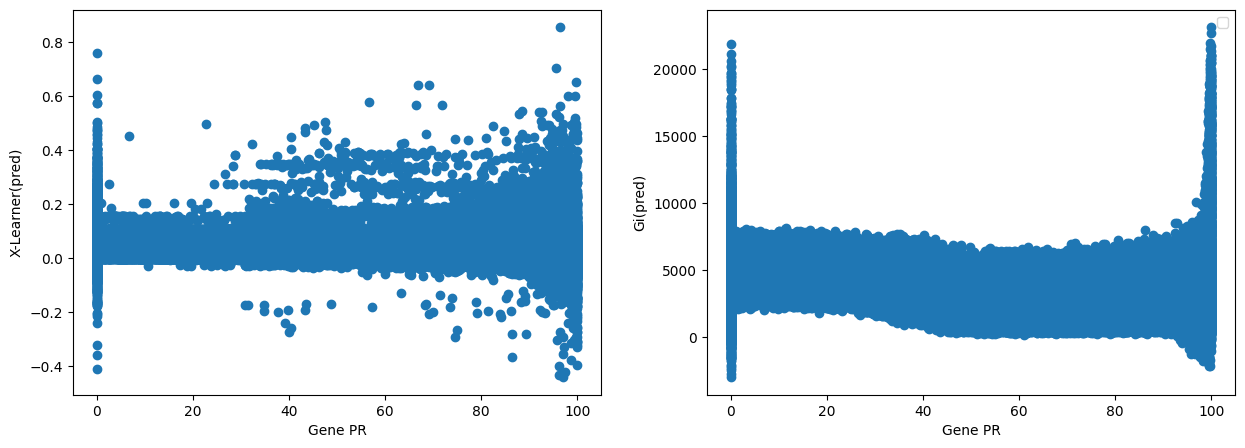

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.scatter(res.iloc[:,1], res['X_te'])
plt.xlabel('Gene PR')
plt.ylabel('X-Learner(pred)')
plt.subplot(122)
plt.scatter(res.iloc[:,1], res.iloc[:,-1])
plt.xlabel('Gene PR')
plt.ylabel('Gi(pred)')
plt.legend()

In [ ]:
res

,UNINO,換匯基因標籤,換匯發送名單,換匯金額,跨售行為,Uplift_mean|T = 0,Uplift_mean|T = 1,Uplift_mean,X_te,"E(V)|X,T = 0","E(V)|X,T = 1",Gi
0,19039293TA8,69.4046,0.0,0.0,0.0,0.002386,0.008154,0.005768,0.003355,177.778387,819.185319,641.406933
1,19042120PA8,66.0392,0.0,0.0,0.0,0.002045,0.009737,0.007692,0.003227,133.481863,859.944493,726.462630
2,19052324OK8,21.5505,0.0,0.0,0.0,0.001096,0.011065,0.009969,0.001252,86.408857,1299.562493,1213.153636
3,19052578MU0,0.0000,0.0,0.0,0.0,0.026656,0.015381,-0.011274,0.007023,4297.286795,3289.496450,-1007.790345
4,19079774PA8,36.2380,0.0,0.0,0.0,0.009134,0.014558,0.005424,0.009497,622.330771,1599.892850,977.562079
...,...,...,...,...,...,...,...,...,...,...,...,...
1053161,Z2229999030,96.6244,0.0,0.0,0.0,0.007352,0.002349,-0.005002,-0.000402,984.089732,341.547089,-642.542642
1053162,Z2422221010,23.6684,0.0,0.0,0.0,0.000982,0.008851,0.007869,0.001056,108.050892,1232.690112,1124.639220
1053163,Z2422273090,89.5261,0.0,0.0,0.0,0.006808,0.003296,-0.003512,0.000387,700.356789,431.574309,-268.782480
1053164,Z2794749990,70.9457,0.0,0.0,0.0,0.002062,0.009770,0.007708,0.002707,124.680001,790.974459,666.294458


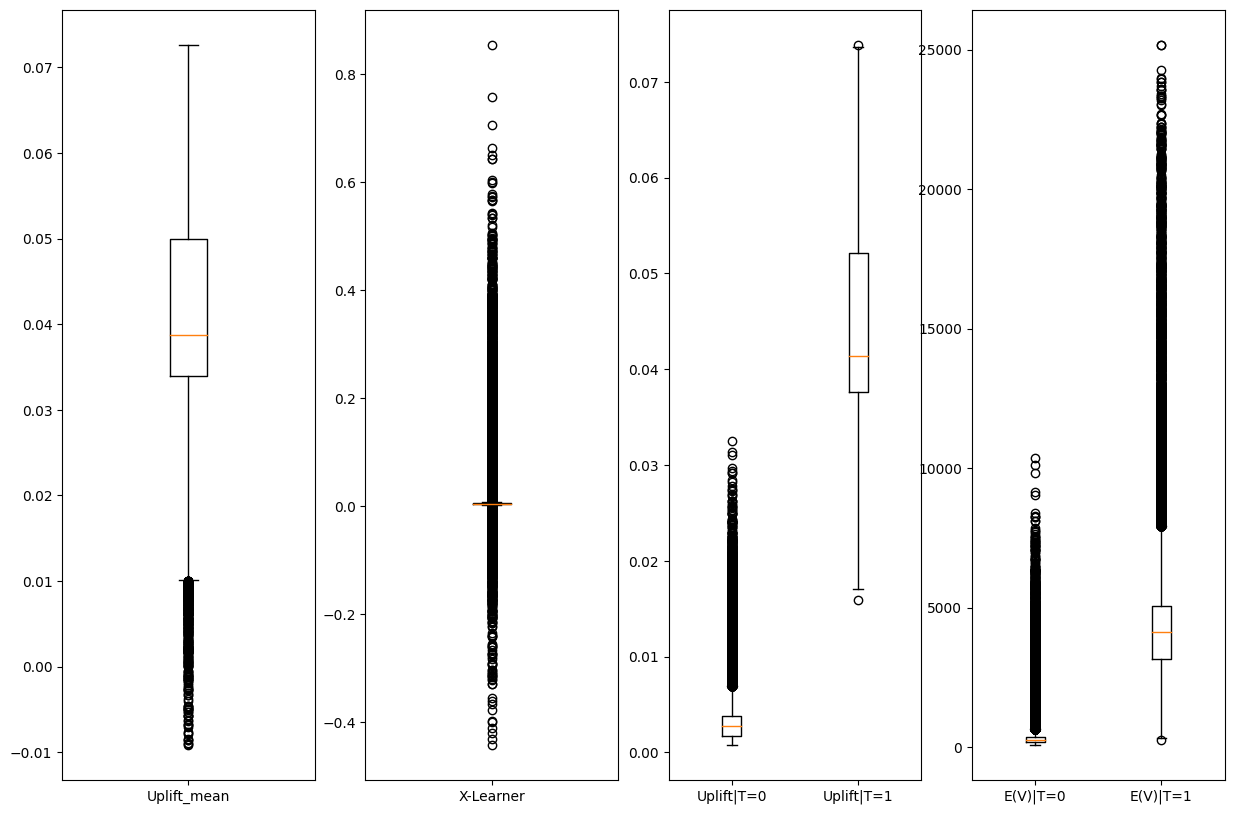

In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize =(15, 10))

plt.subplot(141)
plt.boxplot(res['Uplift_mean'], labels=['Uplift_mean'])
# Creating plot
plt.subplot(142)
plt.boxplot(res['X_te'], labels=['X-Learner'])
plt.subplot(143)
plt.boxplot(res[['Uplift_mean|T = 0', 'Uplift_mean|T = 1']], labels=['Uplift|T=0', 'Uplift|T=1'])
plt.subplot(144)
plt.boxplot(res[['E(V)|X,T = 0', 'E(V)|X,T = 1']], labels=['E(V)|T=0', 'E(V)|T=1'])

# show plot
plt.show()

#名單處理

* Model selection
* Seperate validation sample

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
res

,UNINO,換匯基因標籤,Uplift_mean|T = 0,Uplift_mean|T = 1,Uplift_mean,X_te,"E(V)|X,T = 0","E(V)|X,T = 1",Gi
0,A1521309050,0.0059,0.001373,0.048074,0.046701,0.004857,120.900778,3364.284911,3243.384134
1,A1521310270,43.1608,0.003127,0.043591,0.040463,0.005268,213.316467,2251.258464,2037.941997
2,A1521312590,2.4923,0.001788,0.050031,0.048243,0.004894,162.978677,3708.299031,3545.320354
3,A1521318940,66.0665,0.002848,0.056080,0.053232,0.006392,295.100096,4837.414952,4542.314857
4,A1521321420,15.3138,0.001631,0.062387,0.060756,0.001691,193.417067,6175.182307,5981.765239
...,...,...,...,...,...,...,...,...,...
1054428,Y2729821390,0.0000,0.003953,0.037444,0.033491,0.006932,439.356425,3480.311736,3040.955312
1054429,Y2729821750,86.4484,0.004097,0.034036,0.029939,0.004487,458.271388,2855.056602,2396.785214
1054430,Y2729823350,25.8643,0.001663,0.055808,0.054145,0.004845,225.692785,6512.316657,6286.623872
1054431,Y2729824530,0.0000,0.005949,0.037284,0.031335,0.002764,248.414134,923.727788,675.313654


In [4]:
#既有規則
namelist = pd.read_csv('/content/drive/MyDrive/Sinopac/GroupA_95.csv')
namelist = list(namelist['UNINO'])
print("Length of Gene namelist: ", len(namelist)) #30522

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Sinopac/GroupA_95.csv'

In [70]:
#Econml_CF_DML
print('95% X_te: ',np.percentile(res['X_te_2'], 95, axis = 0))
T = res['UNINO'][res['X_te_2']>=np.percentile(res['X_te_2'], 95, axis = 0)]
print('Length of 95% X_te: ',len(T)) #105444 #52722
#90% X_te: 0.01020450324043671
#95% X_te:  0.02169232042477473
#95% X_te:  0.038385585473267154 (new)

95% X_te:  0.038385585473267134
Length of 95% X_te:  52722


In [73]:
setA1 = set(namelist)
setC1 = set(T)

setB = set(setA1.intersection(setC1))
setA = set(setA1.difference(setB))
setC = set(setC1.difference(setB))

print("Length of A-B: ", len(setA)) #51551 #59295 #12070
print("Length of common namelist(B): ", len(setB)) #14674 #6930 #2866
print('Length of C-B:',len(setC)) #90070 #45792 #49856
'''
Length of A-B:  11766
Length of common namelist(B):  3170
Length of C-B: 49552
'''
print(len(setA1.union(setC1)))
11766+3170+49552

Length of A-B:  11766
Length of common namelist(B):  3170
Length of C-B: 49552
64488


64488

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def Split_equally(SetName):
  # 初始化两个DataFrame，用于存储分割后的子集
  df1 = pd.DataFrame()
  df2 = pd.DataFrame()

  # 根据每个百分位数切割数据，并将子集存入DataFrame
  for percentile in range(100, 0, -1):
    cutoff = np.percentile(res['Uplift_mean|T = 0'][res['UNINO'].isin(SetName)], percentile)
    cutoff_1 = np.percentile(res['Uplift_mean|T = 0'][res['UNINO'].isin(SetName)], percentile-1)
    data = res[(res['Uplift_mean|T = 0'] <= cutoff) & (res['Uplift_mean|T = 0'] > cutoff_1) & (res['UNINO'].isin(SetName))]
    subset1, subset2 = train_test_split(data.copy(), test_size=0.5, random_state=999)

    df1 = pd.concat([df1, subset1])
    df2 = pd.concat([df2, subset2])

  #percentile = 0
  cutoff = np.percentile(res['Uplift_mean|T = 0'][res['UNINO'].isin(SetName)], 0)
  df1 = pd.concat([df1, res[(res['Uplift_mean|T = 0'] <= cutoff) & (res['UNINO'].isin(SetName))]])

  print(len(df1)+len(df2), len(SetName)) #該如何讓這兩個df完全包括subset
  return df1, df2

In [ ]:
%%time
setA_1, setA_2 = Split_equally(setA)
print('setA第一個子集長度：', len(setA_1), ', BASE平均：', round(setA_1['Uplift_mean|T = 0'].mean(), 6))
print('setA第二個子集長度：', len(setA_2), ', BASE平均：', round(setA_2['Uplift_mean|T = 0'].mean(), 6))
setB_1, setB_2 = Split_equally(setB)
print('setB第一個子集長度：', len(setB_1), ', BASE平均：', round(setB_1['Uplift_mean|T = 0'].mean(), 6))
print('setB第二個子集長度：', len(setB_2), ', BASE平均：', round(setB_2['Uplift_mean|T = 0'].mean(), 6))
setC_1, setC_2 = Split_equally(setC)
print('setC第一個子集長度：', len(setC_1), ', BASE平均：', round(setC_1['Uplift_mean|T = 0'].mean(), 6))
print('setC第二個子集長度：', len(setC_2), ', BASE平均：', round(setC_2['Uplift_mean|T = 0'].mean(), 6))

11766 11766
setA第一個子集長度： 5866 , BASE平均： 0.006301
setA第二個子集長度： 5900 , BASE平均： 0.006304
3170 3170
setB第一個子集長度： 1570 , BASE平均： 0.007112
setB第二個子集長度： 1600 , BASE平均： 0.007118
49552 49552
setC第一個子集長度： 24752 , BASE平均： 0.003471
setC第二個子集長度： 24800 , BASE平均： 0.003474
CPU times: user 4min 1s, sys: 1.32 s, total: 4min 2s
Wall time: 4min 11s


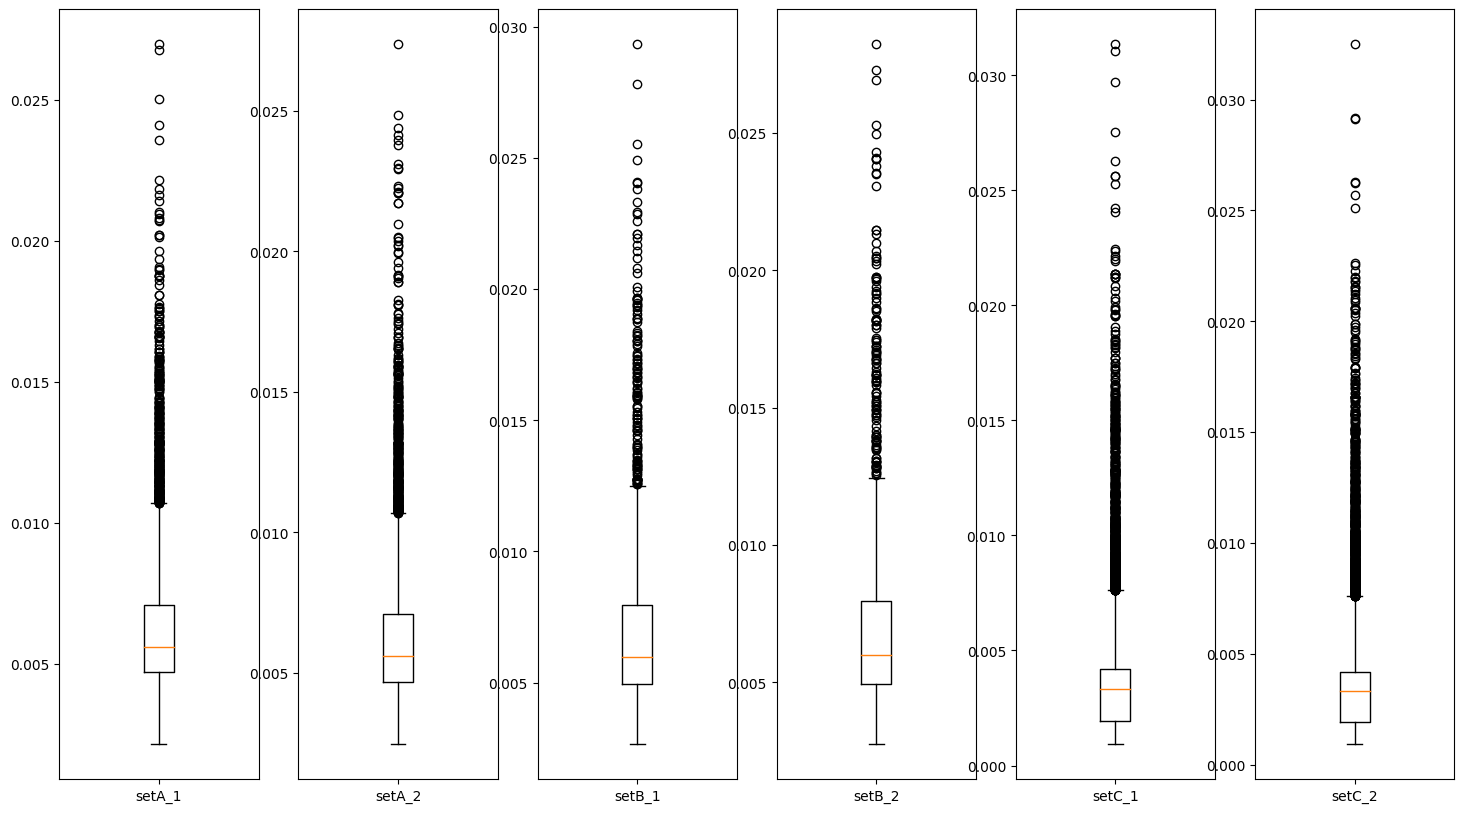

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize =(18, 10))

plt.subplot(161)
plt.boxplot(setA_1['Uplift_mean|T = 0'], labels=['setA_1'])
plt.subplot(162)
plt.boxplot(setA_2['Uplift_mean|T = 0'], labels=['setA_2'])
plt.subplot(163)
plt.boxplot(setB_1['Uplift_mean|T = 0'], labels=['setB_1'])
plt.subplot(164)
plt.boxplot(setB_2['Uplift_mean|T = 0'], labels=['setB_2'])
plt.subplot(165)
plt.boxplot(setC_1['Uplift_mean|T = 0'], labels=['setC_1'])
plt.subplot(166)
plt.boxplot(setC_2['Uplift_mean|T = 0'], labels=['setC_2'])
plt.show()

In [ ]:
##Mean P(Y=1|T=0, X)
#A
P_A = pred['Uplift_mean|T = 0'][pred['UNINO'].isin(setA)]
print("Mean P(Y=1|T=0, X) of A: {:.4f}".format(P_A.mean()))

#B
P_B = pred['Uplift_mean|T = 0'][pred['UNINO'].isin(setB)]
print("Mean P(Y=1|T=0, X) of B: {:.4f}".format(P_B.mean()))

#C#Uplift
P_C = pred['X_te'][pred['UNINO'].isin(setC)]
print('Mean P(Y=1|T=0, X) of C: {:.4f}'.format(P_C.mean())) #

#Mean P(Y=1|T=0, X) of 90% Gene namelist: 0.0044
#Mean P(Y=1|T=0, X) of 90% Gene namelist: 0.0054
#Mean P(Y=1|T=0, X) of 90% X_te: 0.0412

#Mean P(Y=1|T=0, X) of A: 0.0045
#Mean P(Y=1|T=0, X) of B: 0.0059
#Mean P(Y=1|T=0, X) of C: 0.0671

#Mean P(Y=1|T=0, X) of A: 0.0063
#Mean P(Y=1|T=0, X) of B: 0.0071
#Mean P(Y=1|T=0, X) of C: 0.0672

Mean P(Y=1|T=0, X) of A: 0.0063
Mean P(Y=1|T=0, X) of B: 0.0071
Mean P(Y=1|T=0, X) of C: 0.0434


#名單_Value


In [1]:
import pandas as pd
res = pd.read_csv('C:/Users/M07599/Downloads/Prediction_results_All_202308_new.csv', index_col = 0)
res

,UNINO,換匯基因標籤,Uplift_mean|T = 0,Uplift_mean|T = 1,Uplift_mean,X_te,"E(V)|T = 0, D = 1",te,X_te_2,"E(V)|X,T = 0","E(V)|X,T = 1",Gi,Value_X
0,A1521309050,0.0059,0.001373,0.048074,0.046701,0.004857,88067.946333,-18086.505294,0.011754,120.900778,3364.284911,3243.384134,223.705913
1,A1521310270,43.1608,0.003127,0.043591,0.040463,0.005268,68208.224027,-16562.628867,0.012860,213.316467,2251.258464,2037.941997,225.402402
2,A1521312590,2.4923,0.001788,0.050031,0.048243,0.004894,91168.411721,-17048.049118,0.011814,162.978677,3708.299031,3545.320354,224.873296
3,A1521318940,66.0665,0.002848,0.056080,0.053232,0.006392,103617.724284,-17359.005021,0.016154,295.100096,4837.414952,4542.314857,491.291660
4,A1521321420,15.3138,0.001631,0.062387,0.060756,0.001691,118600.440766,-19618.657805,0.014543,193.417067,6175.182307,5981.765239,223.320797
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054428,Y2729821390,0.0000,0.003953,0.037444,0.033491,0.006932,111131.614951,-18184.741163,0.007109,439.356425,3480.311736,3040.955312,488.858419
1054429,Y2729821750,86.4484,0.004097,0.034036,0.029939,0.004487,111857.440722,-27972.861372,0.009792,458.271388,2855.056602,2396.785214,460.483859
1054430,Y2729823350,25.8643,0.001663,0.055808,0.054145,0.004845,135709.481509,-19017.106024,0.011421,225.692785,6512.316657,6286.623872,55.533310
1054431,Y2729824530,0.0000,0.005949,0.037284,0.031335,0.002764,41756.854031,-16981.356344,-0.000560,248.414134,923.727788,675.313654,343.290662


In [ ]:
res

,UNINO,換匯基因標籤,Uplift_mean|T = 0,Uplift_mean|T = 1,Uplift_mean,X_te,"E(V)|T = 0, D = 1",te,X_te_2,"E(V)|X,T = 0","E(V)|X,T = 1",Gi,Value_X
0,A1521309050,0.0059,0.001373,0.048074,0.046701,0.004857,88067.946333,-18086.505294,0.011754,120.900778,3364.284911,3243.384134,223.705913
1,A1521310270,43.1608,0.003127,0.043591,0.040463,0.005268,68208.224027,-16562.628867,0.012860,213.316467,2251.258464,2037.941997,225.402402
2,A1521312590,2.4923,0.001788,0.050031,0.048243,0.004894,91168.411721,-17048.049118,0.011814,162.978677,3708.299031,3545.320354,224.873296
3,A1521318940,66.0665,0.002848,0.056080,0.053232,0.006392,103617.724284,-17359.005021,0.016154,295.100096,4837.414952,4542.314857,491.291660
4,A1521321420,15.3138,0.001631,0.062387,0.060756,0.001691,118600.440766,-19618.657805,0.014543,193.417067,6175.182307,5981.765239,223.320797
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054428,Y2729821390,0.0000,0.003953,0.037444,0.033491,0.006932,111131.614951,-18184.741163,0.007109,439.356425,3480.311736,3040.955312,488.858419
1054429,Y2729821750,86.4484,0.004097,0.034036,0.029939,0.004487,111857.440722,-27972.861372,0.009792,458.271388,2855.056602,2396.785214,460.483859
1054430,Y2729823350,25.8643,0.001663,0.055808,0.054145,0.004845,135709.481509,-19017.106024,0.011421,225.692785,6512.316657,6286.623872,55.533310
1054431,Y2729824530,0.0000,0.005949,0.037284,0.031335,0.002764,41756.854031,-16981.356344,-0.000560,248.414134,923.727788,675.313654,343.290662


In [2]:
#既有規則
namelist = pd.read_csv('C:/Users/M07599/Downloads/GroupA_90.csv')
namelist = list(namelist['UNINO'])
print("Length of Gene namelist: ", len(namelist)) #111251 #30522
#102895

Length of Gene namelist:  102895


In [3]:
res[res.isin(namelist)]

,UNINO,換匯基因標籤,Uplift_mean|T = 0,Uplift_mean|T = 1,Uplift_mean,X_te,"E(V)|T = 0, D = 1",te,X_te_2,"E(V)|X,T = 0","E(V)|X,T = 1",Gi,Value_X
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1054429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1054430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1054431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
import numpy as np
#Econml_CF_DML
print('90% X_te: ',np.percentile(res['X_te_2'], 90, axis = 0))
T = res['UNINO'][res['X_te_2']>=np.percentile(res['X_te_2'], 90, axis = 0)]
print('Length of 90% X_te: ',len(T)) #105444 #52722
#90% X_te: 0.01020450324043671
#90% X_te:  0.0201524839115645 (NEW)
#95% X_te:  0.02169232042477473
#95% X_te:  0.038385585473267154 (new)

90% X_te:  0.0201524839115645
Length of 90% X_te:  105445


In [5]:
#Value
print('90% Gi: ',np.percentile(res['Gi'], 90, axis = 0))
Value = res['UNINO'][res['Gi']>=np.percentile(res['Gi'], 90, axis = 0)]
print('Length of 90% Gi: ',len(Value)) #105444 #52722
#90% Gi:  5621.3923577024325
#95% Gi:  6075.3412961334125

90% Gi:  5621.3923577024325
Length of 90% Gi:  105444


In [6]:
#Value
print('90% Value_X: ',np.percentile(res['Value_X'], 90, axis = 0))
Value_X = res['UNINO'][res['Value_X']>=np.percentile(res['Value_X'], 90, axis = 0)]
print('Length of 90% Value_X: ',len(Value_X)) #105444 #52727
#90% Value_X:  492.004647015063
#95% Value_X:  791.9604115602216

90% Value_X:  492.004647015063
Length of 90% Value_X:  105485


In [107]:
!pip install SQLAlchemy==1.4.35

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.6 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.22
    Uninstalling SQLAlchemy-2.0.22:
      Successfully uninstalled SQLAlchemy-2.0.22
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.10.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.35 which is incompatible.


In [10]:
setA1 = set(namelist)
setC1 = set(T)
set(Value_X)

rawset = setA1.union(setC1).union(set(Value_X))
print(len(rawset)) #105413 #231089
df = pd.DataFrame(rawset, columns = ['UNINO'])

import pyodbc
import sqlalchemy
import urllib

conn = pyodbc.connect(
    'Driver={SQL Server};'
    'Server=10.11.48.12;'
    'UID=[M07599];'
    'Database=FZSRD_PD;'
    'Trusted_Connection=yes;')

#cursor = conn.cursor()
##Create Table
## Insert Dataframe into SQL Server:
params = urllib.parse.quote_plus("Driver={SQL Server};"
                                 "SERVER=10.11.48.12;"
                                 "Database=FZSRD_PD;"
                                 "UID=[M07599];"
                                 "Trusted_Connection=yes;")

engine = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect={}".format(params))
df.to_sql('NAMELIST_202311', engine, if_exists='replace', index=False)

temp = pd.read_sql_query(
    'SELECT * FROM NAMELIST_202311'
    , conn)
conn.close()
temp

231089


,UNINO
0,F1732949040
1,A1520047570
2,F1703641280
3,B2757756500
4,S2791056880
...,...
231084,F1738915890
231085,F1710986470
231086,P1779965440
231087,D1726765450


In [7]:
import pyodbc
import sqlalchemy
import urllib

conn = pyodbc.connect(
    'Driver={SQL Server};'
    'Server=10.11.48.12;'
    'UID=[M07599];'
    'Database=FZSRD_PD;'
    'Trusted_Connection=yes;')

ALL = pd.read_sql_query(
    'SELECT * FROM NAMELIST_202311_FINAL_90'
    , conn)
conn.close()
temp = set(ALL.UNINO)
print(len(temp)) #103924
temp

103924


{'Q1739500130',
 'N2710566330',
 'A2251412500',
 'F2797119470',
 'V1724135990',
 'T2757768380',
 'A2765439550',
 'F2784191880',
 'P1795773550',
 'F2725557880',
 'A1731525940',
 'F1747285560',
 'E1702692850',
 'F1723357520',
 'P1759717500',
 'H2712080690',
 'A2524951950',
 'S1729202500',
 'Q2752973020',
 'A1798650610',
 'A2700482550',
 'E2738902540',
 'A2797296590',
 'S2738782200',
 'X1729004670',
 'A1592880160',
 'R1772427050',
 'H2791943200',
 'A2739852520',
 'B2790999400',
 'A1765696340',
 'A2794484340',
 'A2738025220',
 'F1761922680',
 'E2714276910',
 'F2786764270',
 'F2718722470',
 'H2422598890',
 'A2799727200',
 'L1757196960',
 'A2279800150',
 'F2769185230',
 'A1731861480',
 'H1752379270',
 'G2790074470',
 'G2722096810',
 'A2730778460',
 'P1757466680',
 'M2759762320',
 'R1720528390',
 'T2732894810',
 'P2793765640',
 'A1708488680',
 'C2790505420',
 'F2712391930',
 'A1790046410',
 'B1771804090',
 'H2715218540',
 'P1728739810',
 'S2792378000',
 'K2721738870',
 'A2760714850',
 'C27271

In [12]:
setA1 = set(namelist) & temp
setC1 = set(T) & temp
setB1 = set(Value_X) & temp


setSLV = setA1 & setC1 & setB1
setSL = setA1 & setC1 - setSLV
setLV = setC1 & setB1-setSLV
setSV = setA1 & setB1-setSLV
setS = setA1-setSL-setSV-setSLV
setL = setC1-setSL-setLV-setSLV
setV = setB1-setSV-setLV-setSLV

print("Length of S: ", len(setS)) #6021
print("Length of L: ", len(setL)) #45036
print("Length of V: ", len(setV)) #40925
print("Length of SL: ", len(setSL)) #1629
print("Length of LV: ", len(setLV)) #4516
print("Length of SV: ", len(setSV)) #5745
print("Length of common namelist(SLV): ", len(setSLV)) #1541
'''
Length of S:  38096/13926
Length of L:  73031/31611
Length of V:  50754/23369
Length of SL:  14477/7816
Length of LV:  6680/3278
Length of SV:  36794/17815
Length of common namelist(SLV):  11257/6109
'''
6021+45036+40925+1629+4516+5745+1541

Length of S:  13926
Length of L:  31611
Length of V:  23369
Length of SL:  7816
Length of LV:  3278
Length of SV:  17815
Length of common namelist(SLV):  6109


105413

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

def Split_equally(SetName):
  # 初始化两个DataFrame，用于存储分割后的子集
  df1 = pd.DataFrame()
  df2 = pd.DataFrame()

  # 根据每个百分位数切割数据，并将子集存入DataFrame
  for percentile in range(100, 0, -1):
    cutoff = np.percentile(res['Uplift_mean|T = 0'][res['UNINO'].isin(SetName)], percentile)
    cutoff_1 = np.percentile(res['Uplift_mean|T = 0'][res['UNINO'].isin(SetName)], percentile-1)
    data = res[(res['Uplift_mean|T = 0'] <= cutoff) & (res['Uplift_mean|T = 0'] > cutoff_1) & (res['UNINO'].isin(SetName))]
    subset1, subset2 = train_test_split(data, test_size=0.5, random_state=999)

    df1 = pd.concat([df1, subset1])
    df2 = pd.concat([df2, subset2])
  #percentile = 0
  cutoff = np.percentile(res['Uplift_mean|T = 0'][res['UNINO'].isin(SetName)], 0)
  df1 = pd.concat([df1, res[(res['Uplift_mean|T = 0'] <= cutoff) & (res['UNINO'].isin(SetName))]])

  print(len(df1)+len(df2), len(SetName)) #該如何讓這兩個df完全包括subset
  return df1, df2

In [10]:
sets = {}
# Lists for keys and values
keys_list = ['setS', 'setL', 'setV', 'setSL', 'setLV', 'setSV', 'setSLV' ]
values_list = [setS, setL, setV, setSL, setLV, setSV, setSLV]

# Using the zip() function and the dict() constructor
sets = dict(zip(keys_list, values_list))
sets.keys()

dict_keys(['setS', 'setL', 'setV', 'setSL', 'setLV', 'setSV', 'setSLV'])

In [11]:
%%time
result_dict = {}  # 创建一个字典来存储结果

for key in sets.keys():
  result_dict[f'{str(key)}_1'], result_dict[f'{str(key)}_2'] = Split_equally(sets[key])
  print(str(key), ': ')
  print(f'{str(key)}第一個子集長度：', len(result_dict[f'{str(key)}_1']), ', BASE平均：', round(result_dict[f'{str(key)}_1']['Uplift_mean|T = 0'].mean(), 6),', 金額平均：', round(result_dict[f'{str(key)}_1']['E(V)|X,T = 0'].mean(), 6))
  print(f'{str(key)}第二個子集長度：', len(result_dict[f'{str(key)}_2']), ', BASE平均：', round(result_dict[f'{str(key)}_2']['Uplift_mean|T = 0'].mean(), 6),', 金額平均：', round(result_dict[f'{str(key)}_2']['E(V)|X,T = 0'].mean(), 6))

13710 13926
setS : 
setS第一個子集長度： 6812 , BASE平均： 0.005132 , 金額平均： 747.917455
setS第二個子集長度： 6898 , BASE平均： 0.00513 , 金額平均： 737.17377
31611 31611
setL : 
setL第一個子集長度： 15797 , BASE平均： 0.003383 , 金額平均： 308.511447
setL第二個子集長度： 15814 , BASE平均： 0.00339 , 金額平均： 309.892436
23369 23369
setV : 
setV第一個子集長度： 11666 , BASE平均： 0.004342 , 金額平均： 648.14089
setV第二個子集長度： 11703 , BASE平均： 0.004343 , 金額平均： 643.041155
7816 7816
setSL : 
setSL第一個子集長度： 3901 , BASE平均： 0.0051 , 金額平均： 629.925552
setSL第二個子集長度： 3915 , BASE平均： 0.005108 , 金額平均： 630.566295
3278 3278
setLV : 
setLV第一個子集長度： 1602 , BASE平均： 0.005273 , 金額平均： 795.073769
setLV第二個子集長度： 1676 , BASE平均： 0.005275 , 金額平均： 776.005443
17815 17815
setSV : 
setSV第一個子集長度： 8900 , BASE平均： 0.005261 , 金額平均： 854.064232
setSV第二個子集長度： 8915 , BASE平均： 0.00526 , 金額平均： 849.392605
6109 6109
setSLV : 
setSLV第一個子集長度： 3009 , BASE平均： 0.005652 , 金額平均： 845.44379
setSLV第二個子集長度： 3100 , BASE平均： 0.00565 , 金額平均： 841.693668
CPU times: total: 3min 4s
Wall time: 3min 7s


In [11]:
result_dict.keys()

dict_keys(['setS_1', 'setS_2', 'setL_1', 'setL_2', 'setV_1', 'setV_2', 'setSL_1', 'setSL_2', 'setLV_1', 'setLV_2', 'setSV_1', 'setSV_2', 'setSLV_1', 'setSLV_2'])

In [12]:
%%time
import pandas as pd
# 初始化一个空的DataFrame
df = pd.DataFrame(columns=["UNINO", "標籤"])
unino_list = []
# 初始化String和key
String = 'A'
# 遍历res['UNINO']
for key in sets.keys():
   unino_list = res['UNINO'][res['UNINO'].isin(result_dict[f'{str(key)}_2'].UNINO)].values
   for unino in unino_list:
       # 生成标签
       label = f'數位通路_換匯名單_{str(String)}群'
       # 将数据添加到DataFrame
       df = df.append({"UNINO": unino, "標籤": label}, ignore_index=True)
   # 递增String
   String = chr(ord(String) + 1)
df 
#52021

CPU times: total: 2min 1s
Wall time: 2min 1s


,UNINO,標籤
0,A1294182050,數位通路_換匯名單_A群
1,A1294204410,數位通路_換匯名單_A群
2,A2746381260,數位通路_換匯名單_A群
3,A1521305750,數位通路_換匯名單_A群
4,A1522857780,數位通路_換匯名單_A群
...,...,...
52016,Y2729524080,數位通路_換匯名單_G群
52017,Z2229905650,數位通路_換匯名單_G群
52018,A2735858500,數位通路_換匯名單_G群
52019,Z1222922330,數位通路_換匯名單_G群


In [13]:
%%time
import pandas as pd
# 初始化一个空的DataFrame
df_no = pd.DataFrame(columns=["UNINO", "標籤"])
unino_list = []
# 初始化String和key
String = 'A'
# 遍历res['UNINO']
for key in sets.keys():
   unino_list = res['UNINO'][res['UNINO'].isin(result_dict[f'{str(key)}_1'].UNINO)].values
   for unino in unino_list:
       # 生成标签
       label = f'數位通路_換匯名單_{str(String)}群_未發'
       # 将数据添加到DataFrame
       df_no = df_no.append({"UNINO": unino, "標籤": label}, ignore_index=True)
   # 递增String
   String = chr(ord(String) + 1)
df_no 
#52021

CPU times: total: 2min 1s
Wall time: 2min 1s


,UNINO,標籤
0,A1592437810,數位通路_換匯名單_A群_未發
1,A1529611980,數位通路_換匯名單_A群_未發
2,A1594854320,數位通路_換匯名單_A群_未發
3,A2752430920,數位通路_換匯名單_A群_未發
4,A2700436240,數位通路_換匯名單_A群_未發
...,...,...
51682,W1225509590,數位通路_換匯名單_G群_未發
51683,W2225149050,數位通路_換匯名單_G群_未發
51684,W2225907450,數位通路_換匯名單_G群_未發
51685,W2227117590,數位通路_換匯名單_G群_未發


In [1]:
#df_no.to_csv('C://10.5.130.1/數據經營科_實習生/王聖淳/Uplift model/數位通路_未發換匯名單_202311.csv')
import pandas as pd
df_no = pd.read_csv('C://10.5.130.1/數據經營科_實習生/王聖淳/Uplift model/數位通路_未發換匯名單_202311.csv', index_col = 0)

In [2]:
df_no

,UNINO,標籤
0,A1592437810,數位通路_換匯名單_A群_未發
1,A1529611980,數位通路_換匯名單_A群_未發
2,A1594854320,數位通路_換匯名單_A群_未發
3,A2752430920,數位通路_換匯名單_A群_未發
4,A2700436240,數位通路_換匯名單_A群_未發
...,...,...
51682,W1225509590,數位通路_換匯名單_G群_未發
51683,W2225149050,數位通路_換匯名單_G群_未發
51684,W2225907450,數位通路_換匯名單_G群_未發
51685,W2227117590,數位通路_換匯名單_G群_未發


In [3]:
import pyodbc
import sqlalchemy
import urllib

#cursor = conn.cursor()
##Create Table
## Insert Dataframe into SQL Server:
params = urllib.parse.quote_plus("Driver={SQL Server};"
                                 "SERVER=10.11.48.12;"
                                 "Database=FZSRD_BD;"
                                 "UID=[M07599];"
                                 "Trusted_Connection=yes;")

engine = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect={}".format(params))
df_no.to_sql('數位通路_未發換匯名單_202311', engine, if_exists='replace', index=False)

NameError: name 'temp' is not defined

In [4]:
#df.to_csv('C://10.5.130.1/數據經營科_實習生/王聖淳/Uplift model/數位通路_換匯名單_202311.csv')
df = pd.read_csv('C://10.5.130.1/數據經營科_實習生/王聖淳/Uplift model/數位通路_換匯名單_202311.csv', index_col = 0)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/10.5.130.1/數據經營科_實習生/王聖淳/Uplift model/數位通路_換匯名單_202311.csv'

In [101]:
df[df.duplicated(subset=['UNINO'])]

,UNINO,標籤


In [97]:
##寫入DB
import pyodbc
import sqlalchemy
import urllib

## Insert Dataframe into SQL Server:
params = urllib.parse.quote_plus("Driver={SQL Server};"
                                 "SERVER=10.11.48.12;"
                                 "Database=FZSRD_PD;"
                                 "UID=[M07599];"
                                 "Trusted_Connection=yes;")

engine = sqlalchemy.create_engine("mssql+pyodbc:///?odbc_connect={}".format(params))
df.to_sql('數位通路_換匯名單_202311', engine, if_exists='replace', index=False)

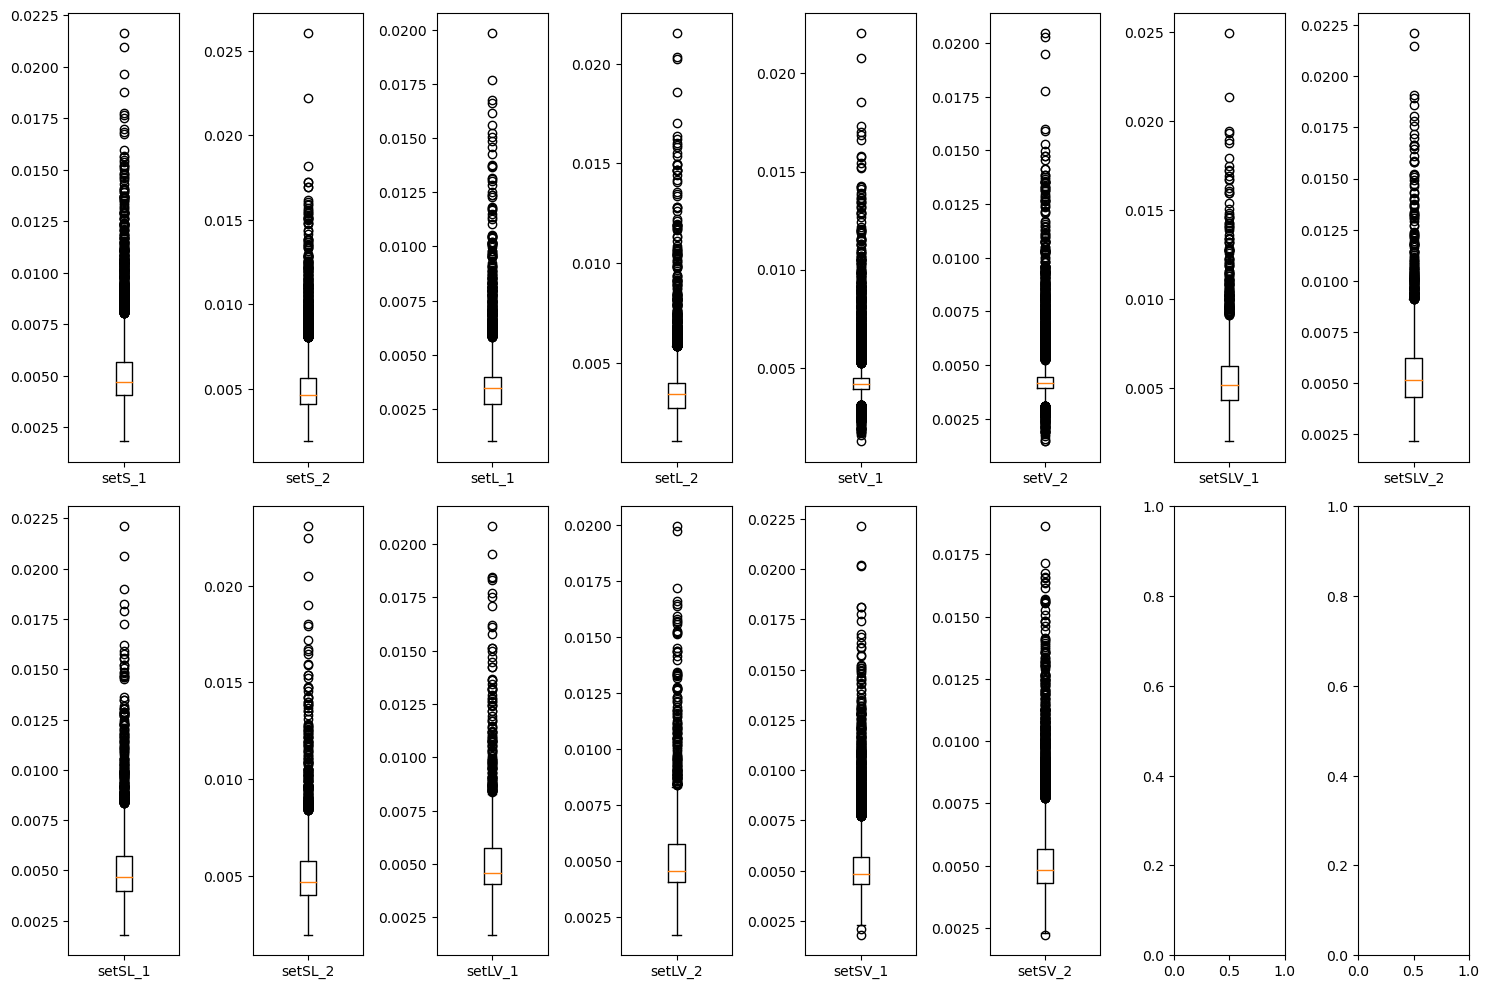

In [94]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,8,figsize = (15, 10))
#S
ax[0,0].boxplot(result_dict['setS_1']['Uplift_mean|T = 0'], labels=['setS_1'])
ax[0,1].boxplot(result_dict['setS_2']['Uplift_mean|T = 0'], labels=['setS_2'])
#L
ax[0,2].boxplot(result_dict['setL_1']['Uplift_mean|T = 0'], labels=['setL_1'])
ax[0,3].boxplot(result_dict['setL_2']['Uplift_mean|T = 0'], labels=['setL_2'])
#V
ax[0,4].boxplot(result_dict['setV_1']['Uplift_mean|T = 0'], labels=['setV_1'])
ax[0,5].boxplot(result_dict['setV_2']['Uplift_mean|T = 0'], labels=['setV_2'])

#SL
ax[1,0].boxplot(result_dict['setSL_1']['Uplift_mean|T = 0'], labels=['setSL_1'])
ax[1,1].boxplot(result_dict['setSL_2']['Uplift_mean|T = 0'], labels=['setSL_2'])
#LV
ax[1,2].boxplot(result_dict['setLV_1']['Uplift_mean|T = 0'], labels=['setLV_1'])
ax[1,3].boxplot(result_dict['setLV_2']['Uplift_mean|T = 0'], labels=['setLV_2'])
#SV
ax[1,4].boxplot(result_dict['setSV_1']['Uplift_mean|T = 0'], labels=['setSV_1'])
ax[1,5].boxplot(result_dict['setSV_2']['Uplift_mean|T = 0'], labels=['setSV_2'])

#SLV
ax[0,6].boxplot(result_dict['setSLV_1']['Uplift_mean|T = 0'], labels=['setSLV_1'])
ax[0,7].boxplot(result_dict['setSLV_2']['Uplift_mean|T = 0'], labels=['setSLV_2'])
plt.tight_layout()
plt.show()

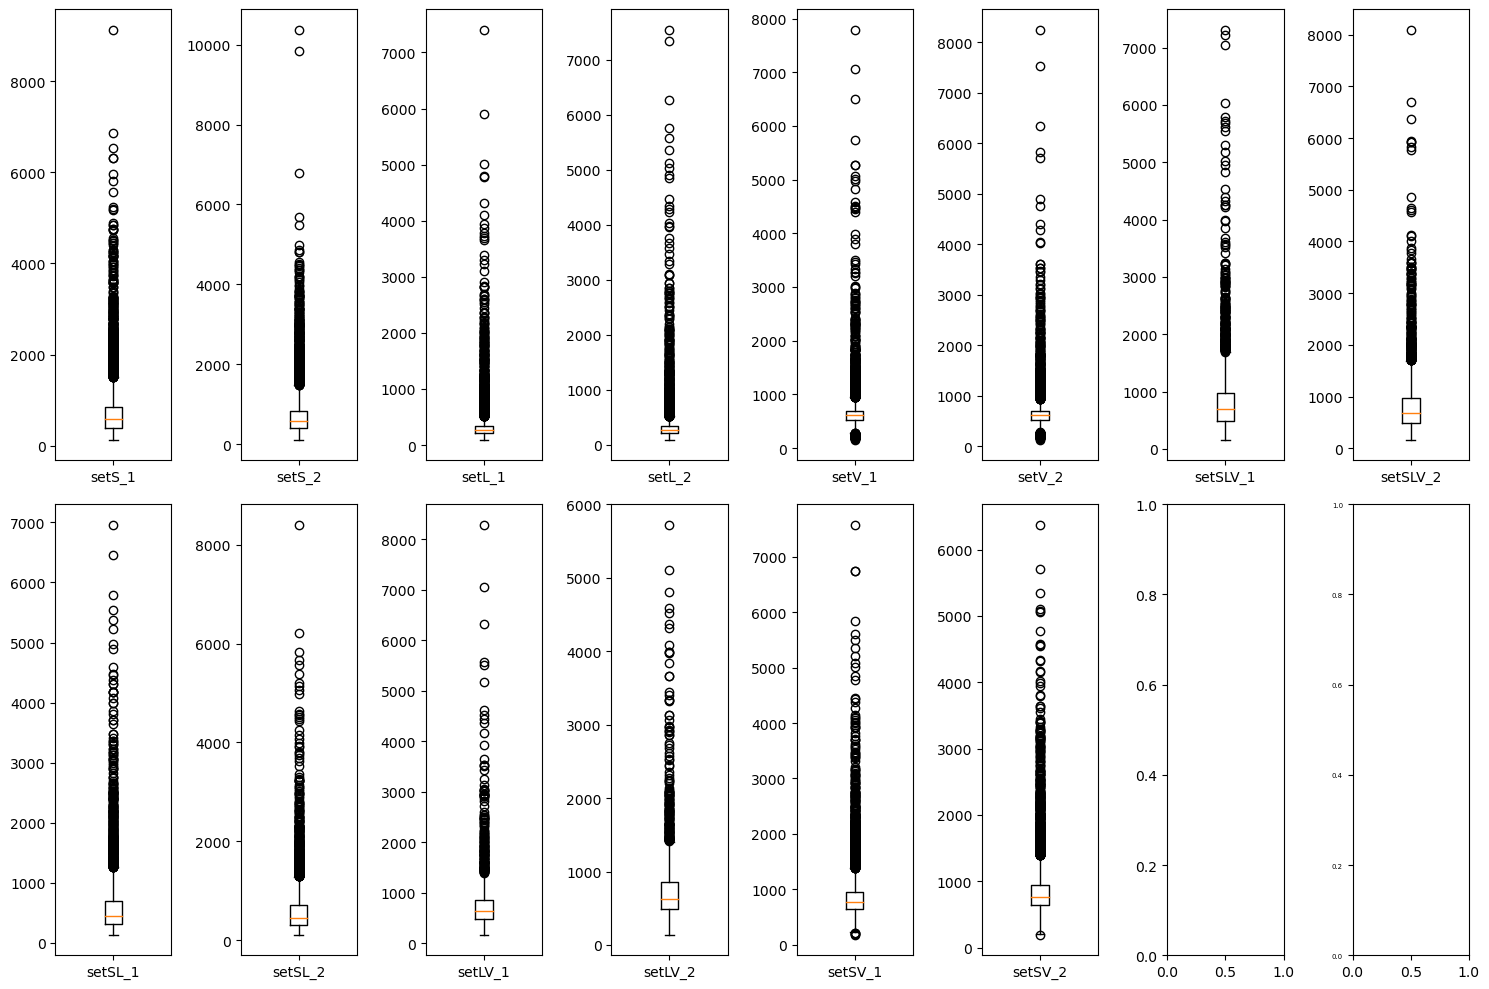

In [95]:
fig, ax = plt.subplots(2,8,figsize = (15, 10))
#S
ax[0,0].boxplot(result_dict['setS_1']['E(V)|X,T = 0'], labels=['setS_1'])
ax[0,1].boxplot(result_dict['setS_2']['E(V)|X,T = 0'], labels=['setS_2'])
#L
ax[0,2].boxplot(result_dict['setL_1']['E(V)|X,T = 0'], labels=['setL_1'])
ax[0,3].boxplot(result_dict['setL_2']['E(V)|X,T = 0'], labels=['setL_2'])
#V
ax[0,4].boxplot(result_dict['setV_1']['E(V)|X,T = 0'], labels=['setV_1'])
ax[0,5].boxplot(result_dict['setV_2']['E(V)|X,T = 0'], labels=['setV_2'])

#SL
ax[1,0].boxplot(result_dict['setSL_1']['E(V)|X,T = 0'], labels=['setSL_1'])
ax[1,1].boxplot(result_dict['setSL_2']['E(V)|X,T = 0'], labels=['setSL_2'])
#LV
ax[1,2].boxplot(result_dict['setLV_1']['E(V)|X,T = 0'], labels=['setLV_1'])
ax[1,3].boxplot(result_dict['setLV_2']['E(V)|X,T = 0'], labels=['setLV_2'])
#SV
ax[1,4].boxplot(result_dict['setSV_1']['E(V)|X,T = 0'], labels=['setSV_1'])
ax[1,5].boxplot(result_dict['setSV_2']['E(V)|X,T = 0'], labels=['setSV_2'])

#SLV
ax[0,6].boxplot(result_dict['setSLV_1']['E(V)|X,T = 0'], labels=['setSLV_1'])
ax[0,7].boxplot(result_dict['setSLV_2']['E(V)|X,T = 0'], labels=['setSLV_2'])
plt.tight_layout()
plt.yticks(fontsize=5)
plt.show()

In [96]:
print("Length of S: ", len(setS)/2) #50653 #58074 #11209
print("Length of L: ", len(setL)/2) #84167 #41878 #45596
print("Length of V: ", len(setV)/2) #95575 #46559 #46919
print("Length of SL: ", len(setSL)/2) #13490 #6416 #2525
print("Length of LV: ", len(setLV)/2) #7787 #4428 #4601
print("Length of SV: ", len(setSV)/2) #2082 #1735 #1202
print("Length of common namelist(SLV): ", len(setSLV)/2) #514 #314
'''
S: 既有規則: 5605(人)
  根據DMP標籤（外匯）與基因模型PR>95
L: Lift Model: 22798(人)
  根據模型增益PR95以上
V: Lift Model(Value): 23459(人)
  根據跨售金額增益模型PR95以上
三個模型集合(簡訊)：4334(人)

Length of S:  6963.0
Length of L:  15805.5
Length of V:  11684.5
Length of SL:  3908.0
Length of LV:  1639.0
Length of SV:  8907.5
Length of common namelist(SLV):  3054.5
'''

Length of S:  6963.0
Length of L:  15805.5
Length of V:  11684.5
Length of SL:  3908.0
Length of LV:  1639.0
Length of SV:  8907.5
Length of common namelist(SLV):  3054.5


2826

In [99]:
##Mean P(Y=1|T=0, X)
#A
P_A = res['Uplift_mean|T = 0'][res['UNINO'].isin(setA1)]
print("Mean P(Y=1|T=0, X) of A: {:.4f}".format(P_A.mean()))

#B
P_B = res['Uplift_mean|T = 0'][res['UNINO'].isin(setB1)]
print("Mean P(Y=1|T=0, X) of B: {:.4f}".format(P_B.mean()))

#C#Uplift
P_C = res['X_te_2'][res['UNINO'].isin(setC1)]
print('Mean P(Y=1|T=0, X) of C: {:.4f}'.format(P_C.mean())) #

Mean P(Y=1|T=0, X) of A: 0.0052
Mean P(Y=1|T=0, X) of B: 0.0049
Mean P(Y=1|T=0, X) of C: 0.0602
